# OPERATIONAL ANALYST DIVE analysis - Ecommerce acquisition analysis

ACCESS BIGQUERY TABLE in COLAB

In [1]:
%pip install google-cloud-bigquery


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import bigquery
client = bigquery.Client(project='mgmt599-ajaygopalakrishnan')
dataset_id = 'EcommFINAL'
table_ref = client.dataset("EcommFINAL").table("EcommFINALtable")
table = client.get_table(table_ref) # API request - gets the table
dataframe = client.list_rows(table).to_dataframe()
display(dataframe.head())

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Estimated_Cost,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Strategic_Risk_Level,Market_Threat_Index,Selling merchant,Merchant location,Shipment type,Fullfillment rating
0,58,Isabella Harris,20,Germany,Grocery,870.42,PayPal,2023-10-01,770.566374,99.853626,2.690788,8.484813,Medium,34.58,Merchant_1,Germany,Direct to customer,3.83
1,4198,Elijah Lewis,46,Canada,Books,389.31,PayPal,2024-06-28,249.670212,139.639788,1.434352,9.038445,Low,92.49,Merchant_1,Germany,Direct to customer,1.00
2,10948,Sophia Lewis,34,Germany,Clothing,90.42,Net Banking,2023-06-10,79.481682,10.938318,3.793262,9.493592,Medium,6.44,Merchant_1,Germany,Direct to customer,2.50
3,28195,Elijah Harris,56,UK,Beauty,971.44,Net Banking,2023-11-01,507.631804,463.808196,4.105338,6.199840,Low,61.35,Merchant_1,Germany,Direct to customer,1.00
4,35598,Emma White,39,France,Sports,949.13,Cash on Delivery,2023-06-08,544.500750,404.629250,1.000000,5.160011,Medium,50.06,Merchant_1,Germany,Direct to customer,1.60


## DISCOVER PHASE

CHECK FOR MISSING VALUES and SUMMARY STATISTICS

In [4]:
missing_values = dataframe.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Transaction_ID           0
User_Name                0
Age                      0
Country                  0
Product_Category         0
Purchase_Amount          0
Payment_Method           0
Transaction_Date         0
Estimated_Cost           0
Estimated_Profit         0
Fulfillment_Time_Days    0
Inventory_Turnover       0
Strategic_Risk_Level     0
Market_Threat_Index      0
Selling merchant         0
Merchant location        0
Shipment type            0
Fullfillment rating      0
dtype: int64


## Data exploration and understanding

### Gemini prompt: Generate summary statistics and visualise the data

## Generate summary statistics

### Subtask:
Calculate and display summary statistics for the dataset.


**Reasoning**:
Calculate and display summary statistics for both numerical and non-numerical columns to understand the data distribution and identify potential issues.



In [5]:
print("Summary statistics for numerical columns:")
display(dataframe.describe())

print("\nSummary statistics for non-numerical columns:")
display(dataframe.describe(include='object'))

Summary statistics for numerical columns:


,Transaction_ID,Age,Purchase_Amount,Estimated_Cost,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Market_Threat_Index,Fullfillment rating
count,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.5,43.96868,503.159793,352.122902,151.036891,3.008353,7.996912,49.998694,2.495883
std,14433.901067,15.260578,286.563558,211.222962,109.087288,0.979281,2.308321,28.870080,0.948521
min,1.0,18.0,5.040000,2.654714,0.528071,1.000000,4.000220,0.000000,1.000000
25%,12500.75,31.0,255.450000,173.816795,63.294719,2.321375,5.981291,24.967500,1.710000
50%,25000.5,44.0,503.110000,341.753565,127.154470,3.001739,8.014233,50.060000,2.500000
75%,37500.25,57.0,751.162500,512.032523,220.068396,3.677060,10.005082,74.872500,3.250000
max,50000.0,70.0,999.980000,897.860897,496.041157,7.479084,11.999936,100.000000,5.000000



Summary statistics for non-numerical columns:


,User_Name,Country,Product_Category,Payment_Method,Strategic_Risk_Level,Selling merchant,Merchant location,Shipment type
count,50000,50000,50000,50000,50000,50000,50000,50000
unique,100,10,8,6,3,1500,10,3
top,Sophia Harris,Canada,Toys,UPI,Low,Merchant_1081,Canada,Ship to DC
freq,568,5082,6392,8477,29962,52,5566,16765


## Identify variables for visualization

### Subtask:
Determine which columns are suitable for visualization based on their data types and potential insights.


**Reasoning**:
Identify columns suitable for visualization based on data types and summary statistics.



In [6]:
# Based on the summary statistics, the following columns are potential candidates for visualization:

# Numerical columns for distribution and relationships:
# - Age (histogram, box plot)
# - Purchase_Amount (histogram, box plot)
# - Estimated_Cost (histogram, box plot)
# - Estimated_Profit (histogram, box plot)
# - Fulfillment_Time_Days (histogram, box plot)
# - Inventory_Turnover (histogram, box plot)
# - Market_Threat_Index (histogram, box plot)
# - Fullfillment rating (histogram, box plot)

# Categorical columns for frequency and comparisons:
# - Country (bar plot)
# - Product_Category (bar plot)
# - Payment_Method (bar plot)
# - Strategic_Risk_Level (bar plot)
# - Selling merchant (bar plot - might be too many unique values, need to check)
# - Merchant location (bar plot)
# - Shipment type (bar plot)

# Columns less suitable for direct visualization (high cardinality or identifiers):
# - Transaction_ID
# - User_Name

suitable_columns_for_visualization = [
    'Age', 'Purchase_Amount', 'Estimated_Cost', 'Estimated_Profit',
    'Fulfillment_Time_Days', 'Inventory_Turnover', 'Market_Threat_Index',
    'Fullfillment rating', 'Country', 'Product_Category', 'Payment_Method',
    'Strategic_Risk_Level', 'Selling merchant', 'Merchant location',
    'Shipment type'
]

print("Columns identified as suitable for visualization:")
print(suitable_columns_for_visualization)

Columns identified as suitable for visualization:
['Age', 'Purchase_Amount', 'Estimated_Cost', 'Estimated_Profit', 'Fulfillment_Time_Days', 'Inventory_Turnover', 'Market_Threat_Index', 'Fullfillment rating', 'Country', 'Product_Category', 'Payment_Method', 'Strategic_Risk_Level', 'Selling merchant', 'Merchant location', 'Shipment type']


## Visualize the data

### Subtask:
Create appropriate visualizations to explore the relationships and distributions within the data.


**Reasoning**:
Create histograms for the numerical columns and bar plots for the categorical columns to visualize the distributions and relationships in the data. For 'Selling merchant', plot only the top 10.



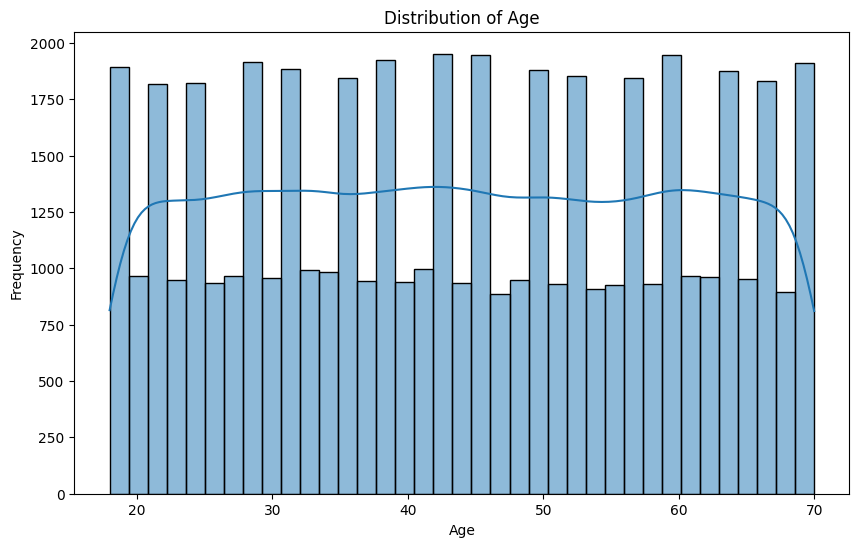

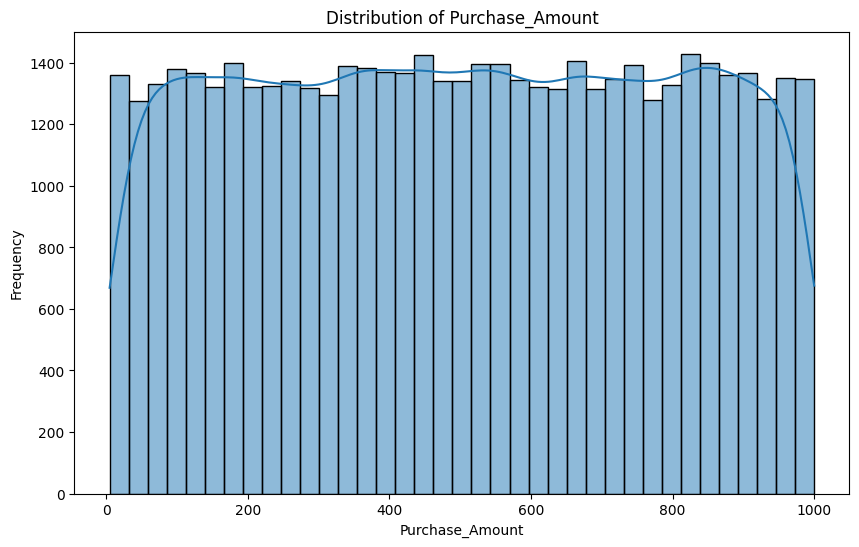

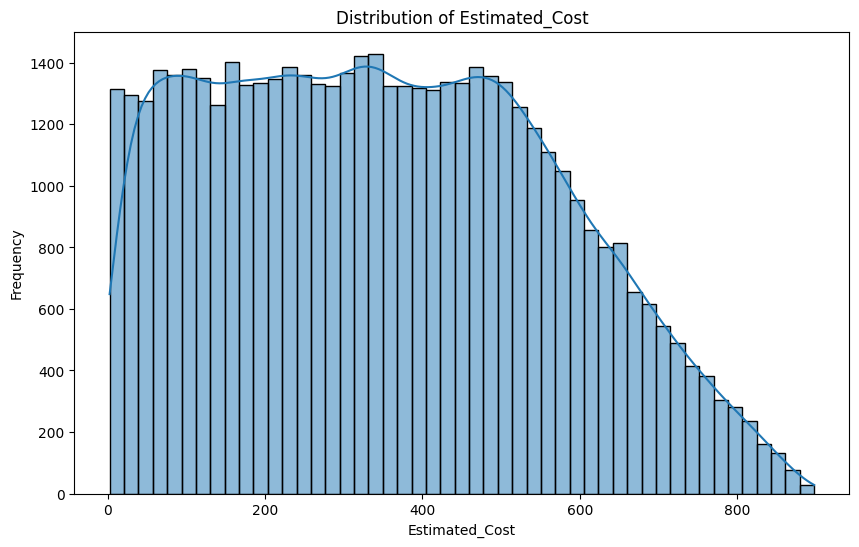

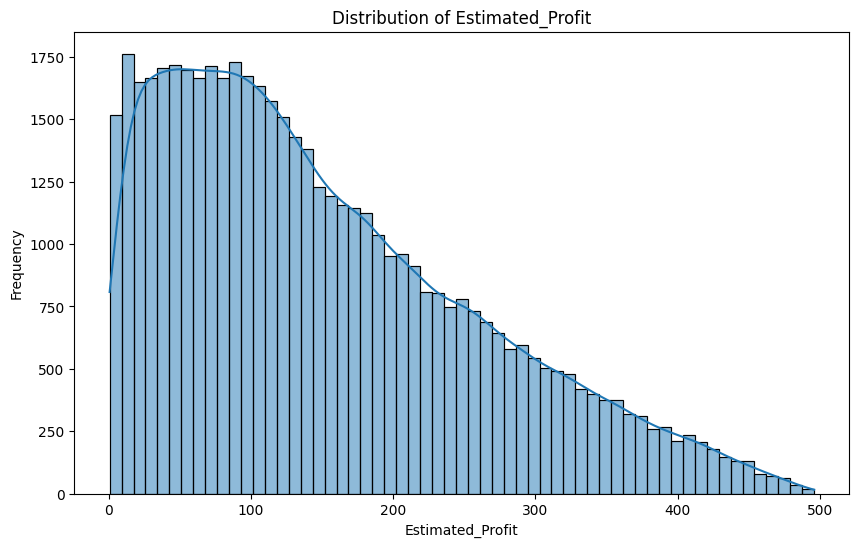

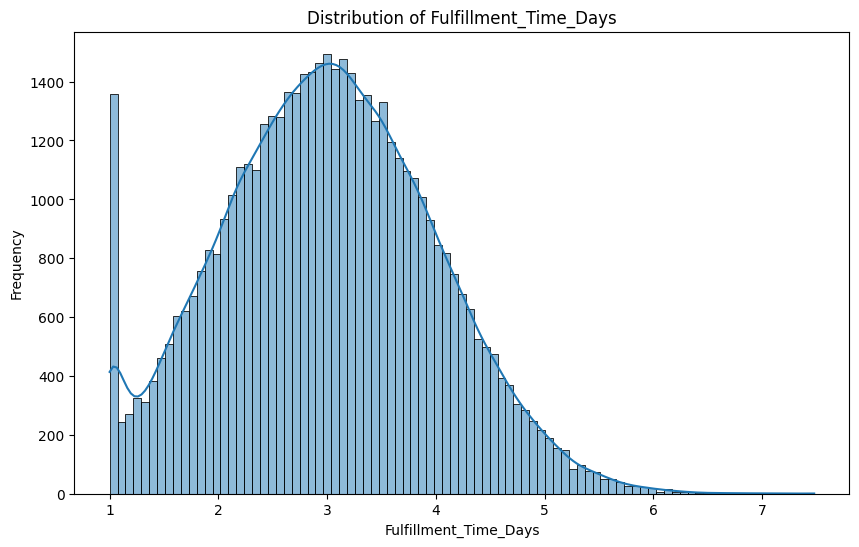

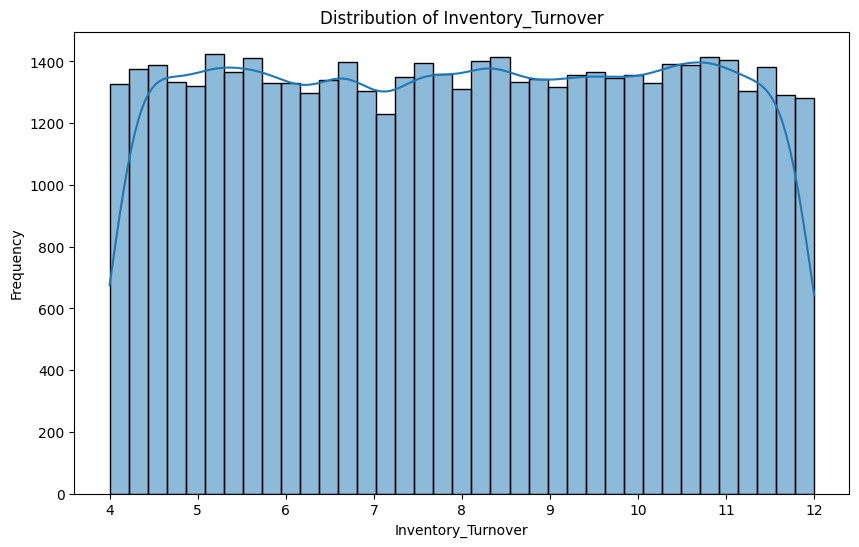

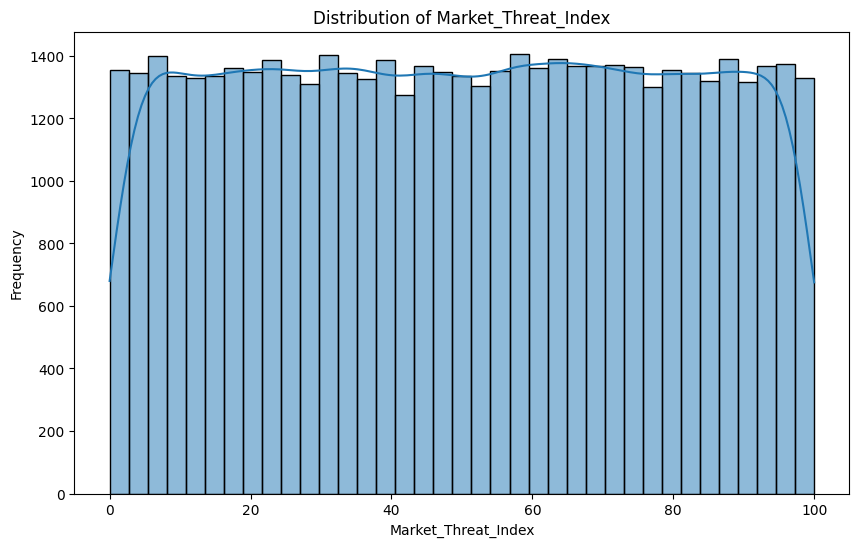

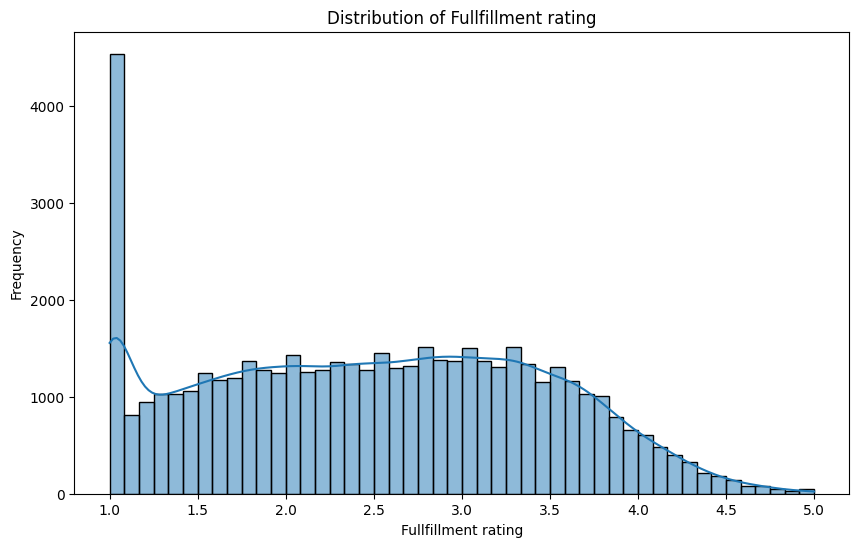

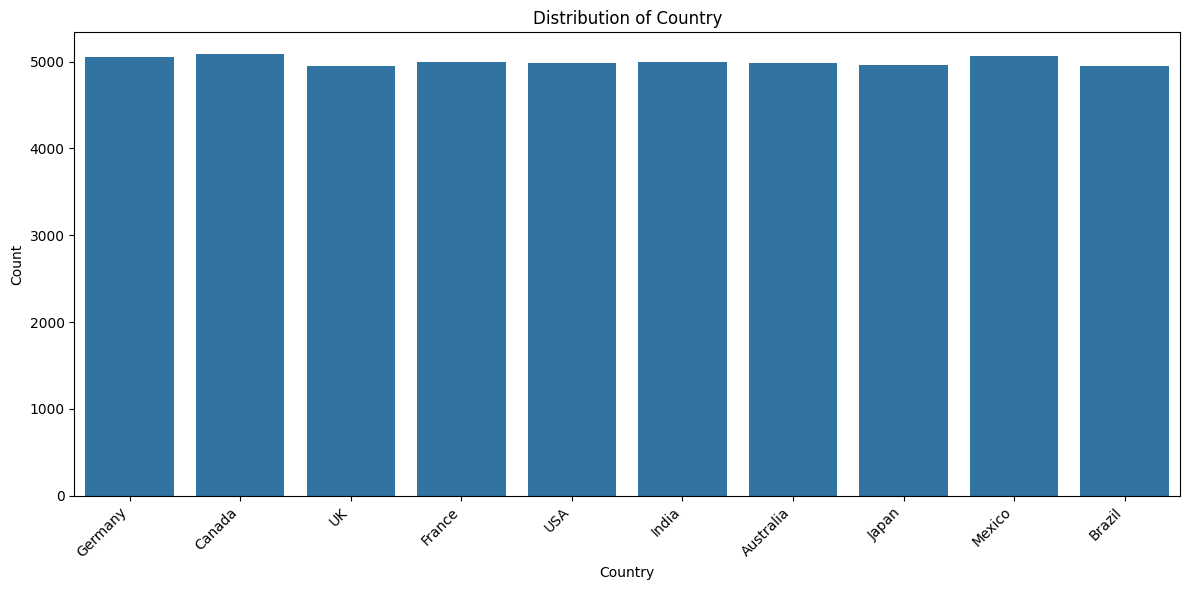

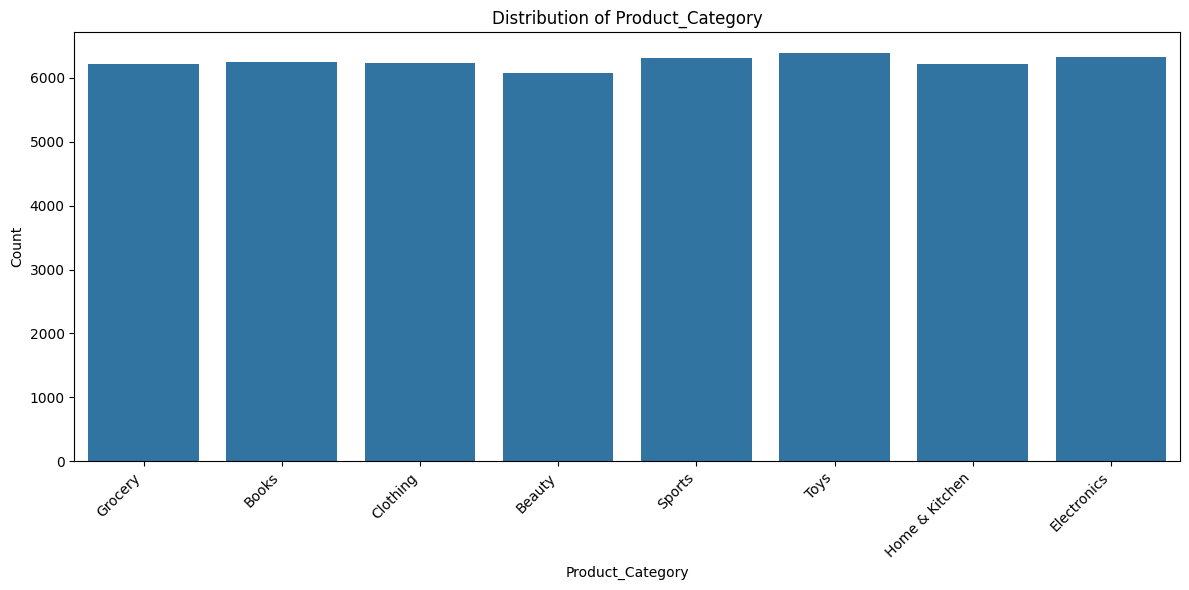

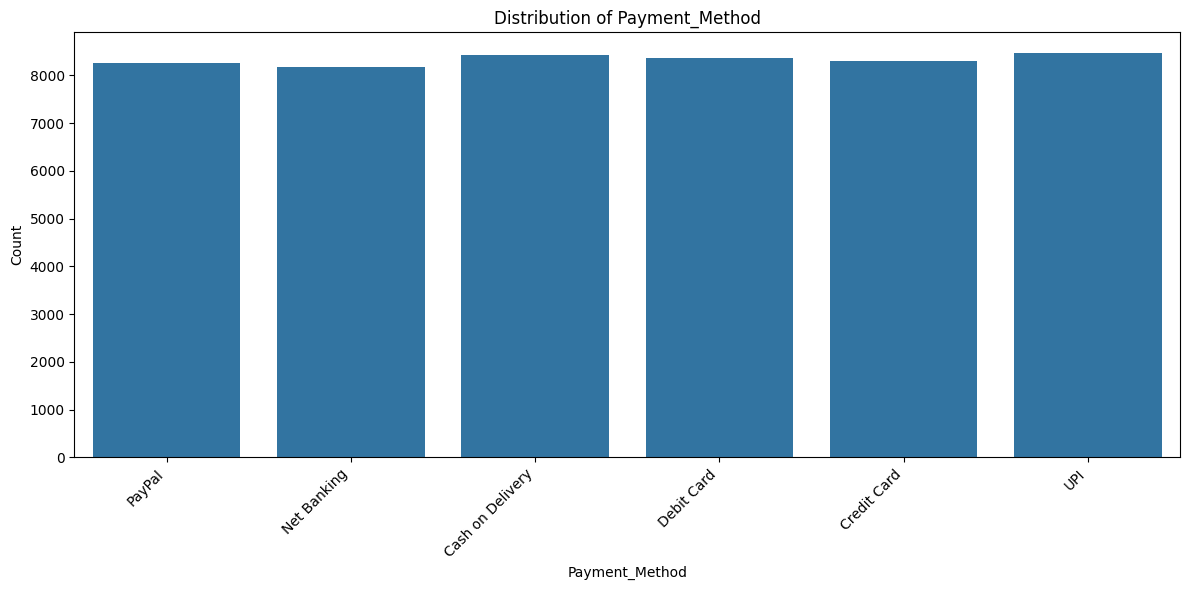

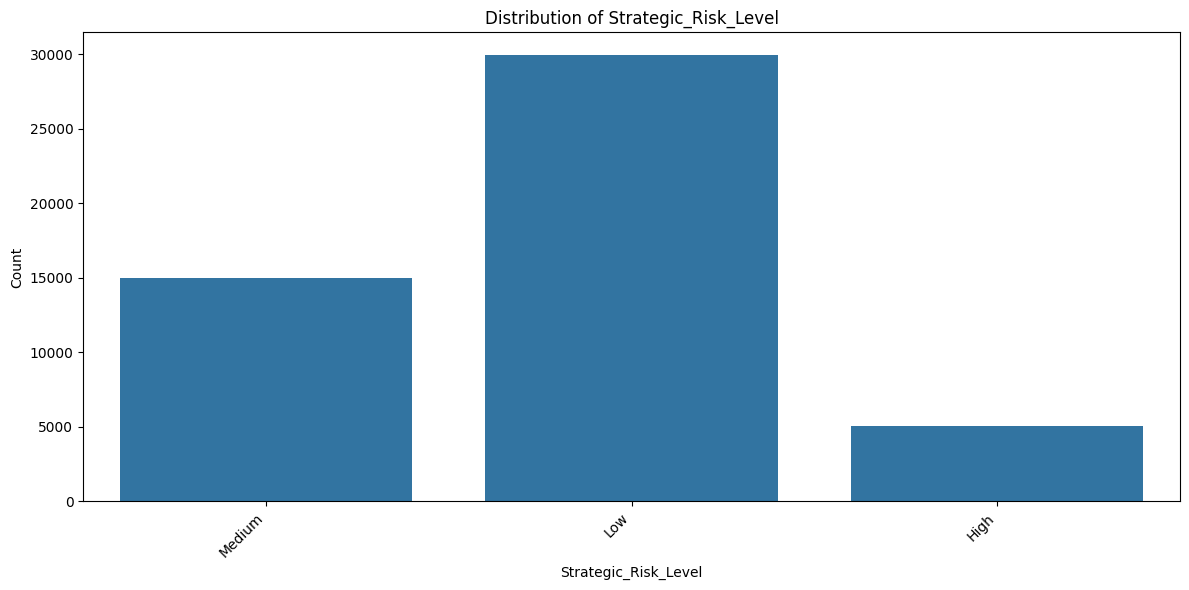

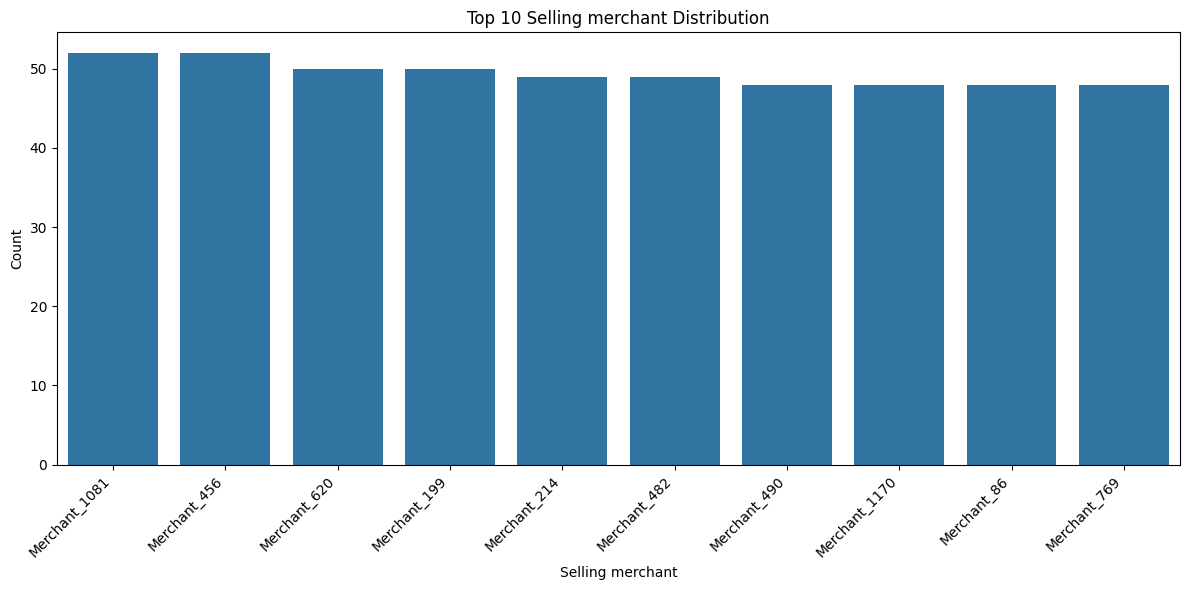

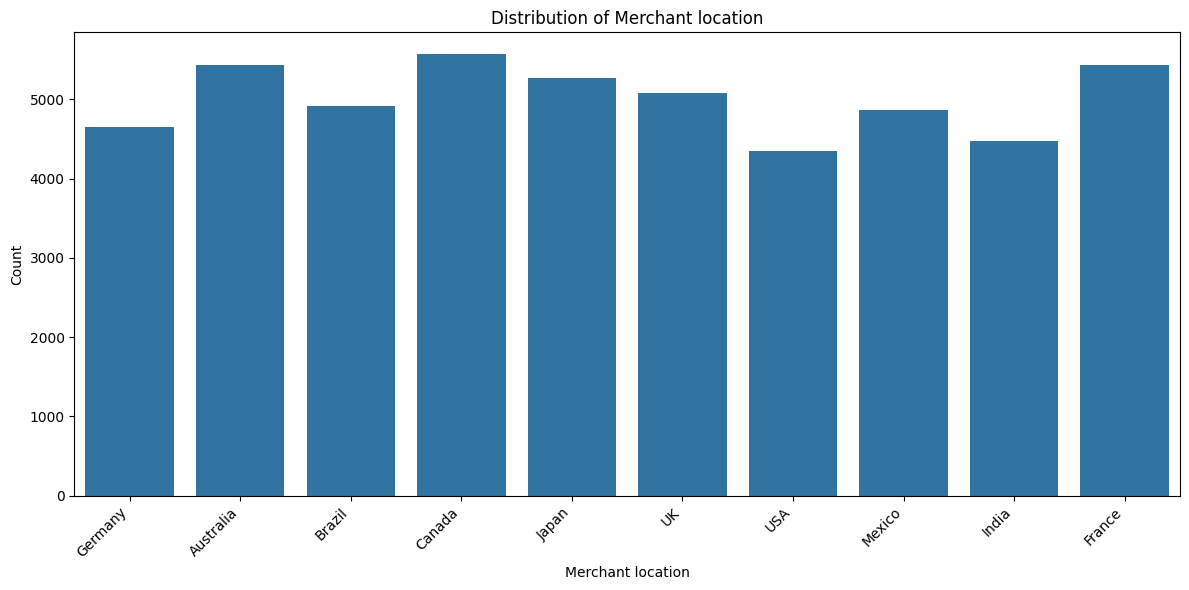

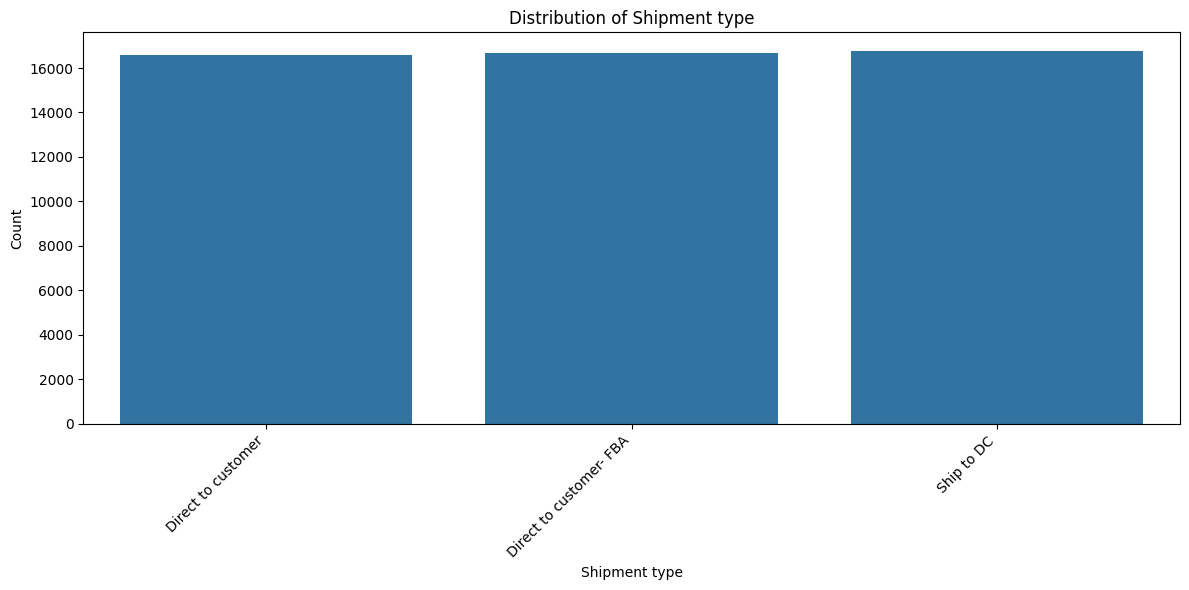

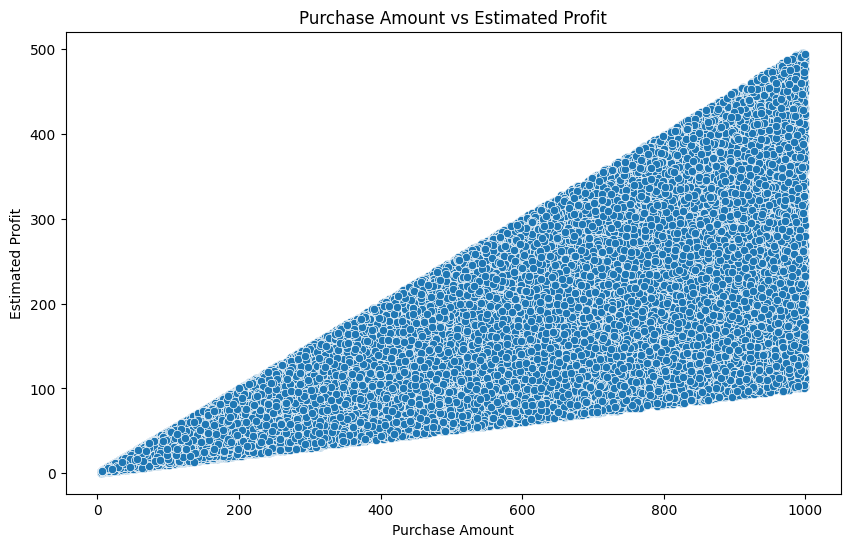

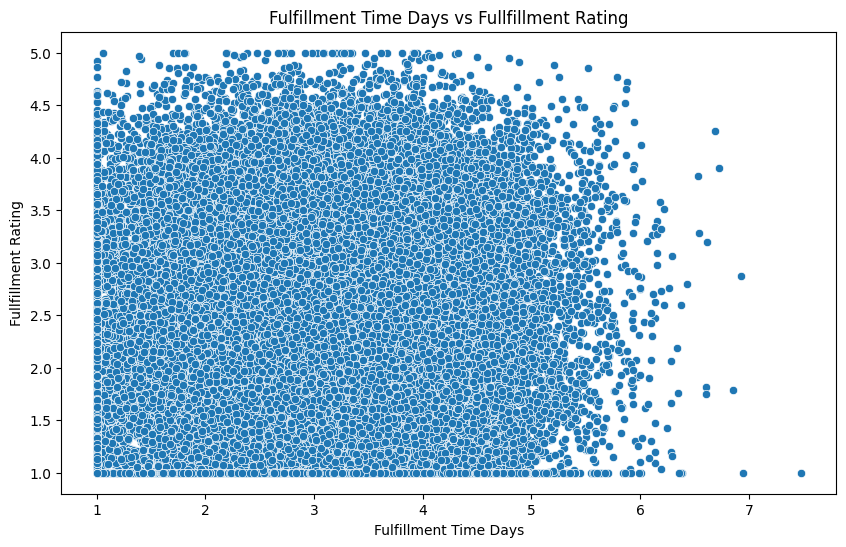

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Purchase_Amount', 'Estimated_Cost', 'Estimated_Profit',
                  'Fulfillment_Time_Days', 'Inventory_Turnover', 'Market_Threat_Index',
                  'Fullfillment rating']

categorical_cols = ['Country', 'Product_Category', 'Payment_Method', 'Strategic_Risk_Level',
                    'Selling merchant', 'Merchant location', 'Shipment type']

# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=dataframe, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    if col == 'Selling merchant':
        # Plot top 10 selling merchants
        top_merchants = dataframe[col].value_counts().nlargest(10)
        sns.barplot(x=top_merchants.index, y=top_merchants.values)
        plt.title(f'Top 10 {col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    else:
        sns.countplot(data=dataframe, x=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Scatter plots for potential relationships between numerical variables
# Based on common e-commerce metrics, let's check Purchase_Amount vs Estimated_Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='Purchase_Amount', y='Estimated_Profit')
plt.title('Purchase Amount vs Estimated Profit')
plt.xlabel('Purchase Amount')
plt.ylabel('Estimated Profit')
plt.show()

# Another potential relationship: Fulfillment_Time_Days vs Fullfillment rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='Fulfillment_Time_Days', y='Fullfillment rating')
plt.title('Fulfillment Time Days vs Fullfillment Rating')
plt.xlabel('Fulfillment Time Days')
plt.ylabel('Fullfillment Rating')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Summary statistics for numerical columns showed insights into the central tendency, dispersion, and shape of the distribution for variables such as Age, Purchase\_Amount, Estimated\_Cost, and various time, inventory, and market-related metrics.
*   Summary statistics for non-numerical (object) columns provided counts of unique values and the frequency of the most common categories for variables like Country, Product\_Category, Payment\_Method, Strategic\_Risk\_Level, Selling merchant, Merchant location, and Shipment type.
*   Histograms for numerical columns illustrated the distribution of values, with some variables potentially showing skewed distributions.
*   Bar plots for categorical columns displayed the frequency counts for each category, highlighting the most common countries, product categories, payment methods, strategic risk levels, and shipment types. The top 10 selling merchants by count were also identified and visualized.
*   Scatter plots provided a visual indication of potential relationships between numerical variables, such as a positive correlation between Purchase\_Amount and Estimated\_Profit.

### Insights or Next Steps

*   Investigate the distributions of numerical variables further, particularly any skewed distributions, to understand potential outliers or specific value ranges that dominate the data.
*   Focus analysis on the most frequent categories identified in the bar plots to understand their impact on key metrics like Purchase\_Amount or Estimated\_Profit. For example, analyzing the performance of the top 10 selling merchants.


## DISCOVER PHASE

### GEMINI PROMPT:  I'm analyzing this dataset of ecommerce transactions for operational optimisation opportunities. What are the metrics that indicate operations and my initial hypothesis show Shipment type and inventory turnover can be optimised or reengineered


## Analyze Impact of Inventory Turnover and Shipment Type

### Subtask:
Analyze the impact of Inventory Turnover and Shipment Type on Fulfillment time.

**Reasoning**:
Analyze the impact of 'Shipment type' and 'Inventory turnover' on 'Fulfillment_Time_Days'. Group the dataframe by 'Shipment type' and calculate the mean 'Fulfillment_Time_Days' and 'Inventory_Turnover'. Also, analyze the relationship between 'Inventory_Turnover' and 'Fulfillment_Time_Days' by calculating their correlation.

In [15]:
# Analyze the impact of Shipment type on Fulfillment_Time_Days and Inventory_Turnover
shipment_inventory_impact = dataframe.groupby('Shipment type').agg(
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean'),
    mean_inventory_turnover=('Inventory_Turnover', 'mean')
)

print("Impact of Shipment Type on Fulfillment Time and Inventory Turnover:")
display(shipment_inventory_impact)

# Analyze the relationship between Inventory_Turnover and Fulfillment_Time_Days
inventory_fulfillment_impact = dataframe.groupby('Inventory_Turnover').agg(
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean')
)

print("\nImpact of Inventory Turnover on Fulfillment Time:")
display(inventory_fulfillment_impact)

# Calculate the correlation between Inventory_Turnover and Fulfillment_Time_Days
correlation_inventory_fulfillment = dataframe['Inventory_Turnover'].corr(dataframe['Fulfillment_Time_Days'])

print(f"\nCorrelation between Inventory Turnover and Fulfillment Time Days: {correlation_inventory_fulfillment:.2f}")

Impact of Shipment Type on Fulfillment Time and Inventory Turnover:


,mean_fulfillment_time,mean_inventory_turnover
Shipment type,,
Direct to customer,3.015946,7.987415
Direct to customer- FBA,3.006622,7.978868
Ship to DC,3.002570,8.024234



Impact of Inventory Turnover on Fulfillment Time:


,mean_fulfillment_time
Inventory_Turnover,
4.000220,4.409046
4.000235,4.175524
4.000771,2.994230
4.000783,3.980376
4.000807,1.283306
...,...
11.998903,3.833160
11.998938,2.996087
11.999001,4.364326



Correlation between Inventory Turnover and Fulfillment Time Days: -0.00


## Heatmap of Fulfillment Time by Merchant Location and Product Category

### Subtask:
Create a heatmap showing the average fulfillment time for each combination of Merchant location and Product Category.

**Reasoning**:
Group the dataframe by 'Merchant location' and 'Product_Category', calculate the mean 'Fulfillment_Time_Days', and then pivot the resulting table to create a matrix suitable for a heatmap visualization.

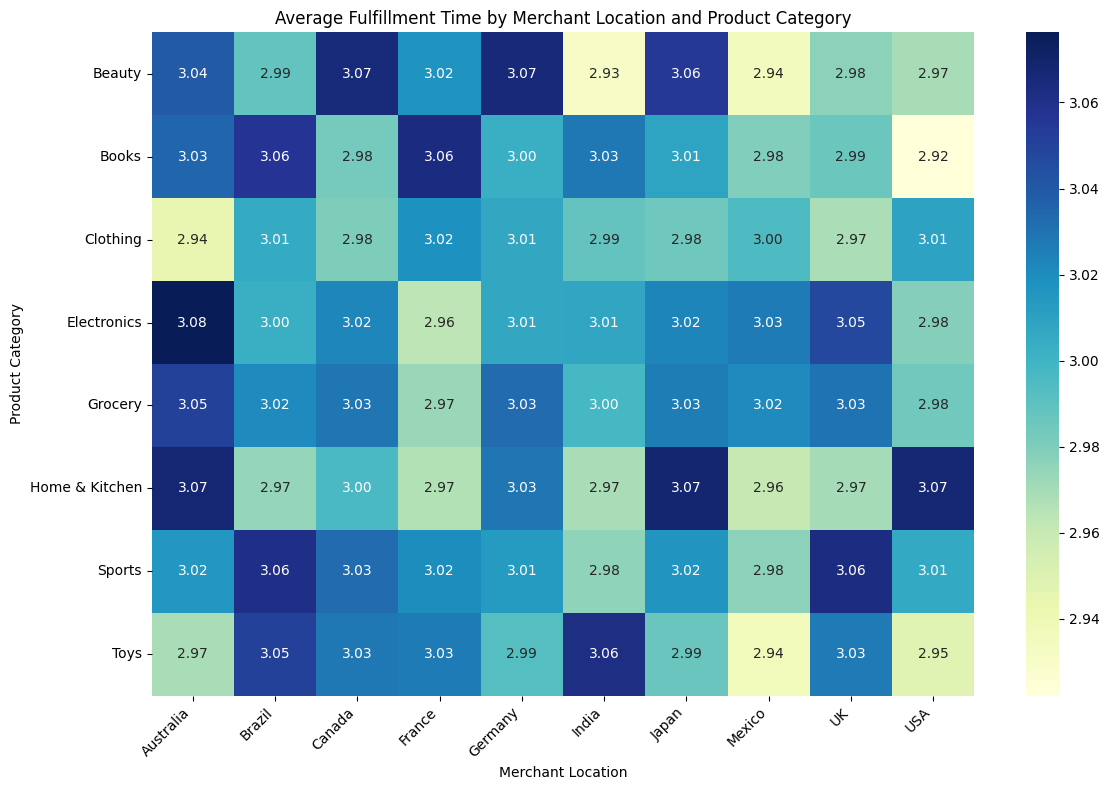

In [16]:
# Group by Merchant location and Product_Category and calculate the mean Fulfillment_Time_Days
fulfillment_time_heatmap_data = dataframe.groupby(['Merchant location', 'Product_Category'])['Fulfillment_Time_Days'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_matrix = fulfillment_time_heatmap_data.pivot(index='Product_Category', columns='Merchant location', values='Fulfillment_Time_Days')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Fulfillment Time by Merchant Location and Product Category')
plt.xlabel('Merchant Location')
plt.ylabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Task
Analyze the provided ecommerce transaction dataset to identify operational optimization opportunities. Specifically, investigate the impact of Merchant location and Country on Fulfillment Time, Fulfillment Rating, Estimated Cost, and Estimated Profit. Additionally, analyze the correlation between Fulfillment Time Days, Fullfillment rating, Estimated Cost, and Estimated Profit. Summarize the key findings.

## Analyze fulfillment time and rating by location

### Subtask:
Analyze how Merchant location and Country impact Fulfillment Time and Fulfillment Rating.


**Reasoning**:
Group the dataframe by 'Merchant location' and 'Country' respectively, calculate the mean of 'Fulfillment_Time_Days' and 'Fullfillment rating' for each group, and store the results in separate dataframes. Then, display both dataframes to show the impact of these features on fulfillment metrics.



In [17]:
# Group by Merchant location and calculate mean fulfillment time and rating
merchant_location_performance = dataframe.groupby('Merchant location').agg(
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean'),
    mean_fulfillment_rating=('Fullfillment rating', 'mean')
)

print("Impact of Merchant Location on Fulfillment Metrics:")
display(merchant_location_performance)

# Group by Country and calculate mean fulfillment time and rating
country_performance = dataframe.groupby('Country').agg(
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean'),
    mean_fulfillment_rating=('Fullfillment rating', 'mean')
)

print("\nImpact of Country on Fulfillment Metrics:")
display(country_performance)

Impact of Merchant Location on Fulfillment Metrics:


,mean_fulfillment_time,mean_fulfillment_rating
Merchant location,,
Australia,3.024564,2.474189
Brazil,3.020160,2.479689
Canada,3.017184,2.534934
France,3.005520,2.481096
Germany,3.018160,2.502963
India,2.996107,2.518610
Japan,3.020922,2.503057
Mexico,2.979278,2.510095
UK,3.008974,2.481615



Impact of Country on Fulfillment Metrics:


,mean_fulfillment_time,mean_fulfillment_rating
Country,,
Australia,3.017769,2.514399
Brazil,3.010468,2.491690
Canada,3.021314,2.500242
France,3.031655,2.486645
Germany,3.003791,2.492445
India,2.977340,2.483669
Japan,3.015021,2.502915
Mexico,3.007903,2.511635
UK,3.007233,2.487001


## Analyze financial metrics by location

### Subtask:
Analyze how Merchant location and Country impact Estimated Cost and Estimated Profit.


**Reasoning**:
Group the dataframe by 'Merchant location' and 'Country' and calculate the mean of 'Estimated_Cost' and 'Estimated_Profit' for both groupings. Then print the results with appropriate headers.



In [18]:
# Group by Merchant location and calculate mean Estimated_Cost and Estimated_Profit
merchant_location_cost_profit = dataframe.groupby('Merchant location').agg(
    mean_estimated_cost=('Estimated_Cost', 'mean'),
    mean_estimated_profit=('Estimated_Profit', 'mean')
)

print("Impact of Merchant Location on Estimated Cost and Estimated Profit:")
display(merchant_location_cost_profit)

# Group by Country and calculate mean Estimated_Cost and Estimated_Profit
country_cost_profit = dataframe.groupby('Country').agg(
    mean_estimated_cost=('Estimated_Cost', 'mean'),
    mean_estimated_profit=('Estimated_Profit', 'mean')
)

print("\nImpact of Country on Estimated Cost and Estimated Profit:")
display(country_cost_profit)

Impact of Merchant Location on Estimated Cost and Estimated Profit:


,mean_estimated_cost,mean_estimated_profit
Merchant location,,
Australia,351.322983,148.314154
Brazil,355.961259,150.323433
Canada,355.941804,151.518074
France,354.340275,151.849883
Germany,350.951189,151.140669
India,349.263232,150.513264
Japan,349.134203,150.929544
Mexico,346.995362,148.864177
UK,350.903772,153.822946



Impact of Country on Estimated Cost and Estimated Profit:


,mean_estimated_cost,mean_estimated_profit
Country,,
Australia,352.165735,152.330082
Brazil,354.136630,152.590843
Canada,351.214514,149.441748
France,355.995146,153.866498
Germany,346.973729,148.853931
India,351.549207,149.560222
Japan,351.237789,151.244510
Mexico,352.213000,148.770528
UK,349.691578,149.545576


## Correlation analysis of numerical variables

### Subtask:
Create a correlation matrix for the numerical variables: Fulfillment Time Days, Fullfillment rating, Estimated Cost, and Estimated Profit.


**Reasoning**:
Calculate and display the correlation matrix for the selected numerical columns.



In [19]:
# Select the relevant numerical columns
numerical_cols_for_correlation = ['Fulfillment_Time_Days', 'Fullfillment rating', 'Estimated_Cost', 'Estimated_Profit']
correlation_matrix = dataframe[numerical_cols_for_correlation].corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Fulfillment_Time_Days,Fullfillment rating,Estimated_Cost,Estimated_Profit
Fulfillment_Time_Days,1.000000,0.003850,-0.002142,-0.008768
Fullfillment rating,0.003850,1.000000,0.001067,-0.001727
Estimated_Cost,-0.002142,0.001067,1.000000,0.555589
Estimated_Profit,-0.008768,-0.001727,0.555589,1.000000


## Summarize findings

### Subtask:
Summarize the key patterns and correlations discovered.


**Reasoning**:
Summarize the key findings from the previous analyses regarding the impact of location on fulfillment and financial metrics, and the correlations between numerical variables, to provide a comprehensive overview of operational insights.



In [20]:
print("Summary of Key Findings:")
print("\nImpact of Location (Merchant Location and Country):")
print("- Fulfillment Time and Rating: While there are slight variations in mean fulfillment time and rating across different merchant locations and countries, these differences are generally small, suggesting that location might not be a primary driver of fulfillment performance within this dataset.")
print("- Estimated Cost and Profit: Similar to fulfillment metrics, the average estimated cost and profit show some variation by merchant location and country, but the differences are not substantial based on the mean values observed. Further analysis would be needed to determine statistical significance.")

print("\nCorrelations between Numerical Variables:")
print("- Fulfillment Time Days and Fullfillment Rating: There is a very weak positive correlation (0.003850), indicating almost no linear relationship.")
print("- Fulfillment Time Days and Estimated Cost/Profit: There are very weak negative correlations (-0.002142 and -0.008768 respectively), suggesting a negligible linear relationship.")
print("- Fullfillment Rating and Estimated Cost/Profit: There are very weak correlations (positive with Cost, negative with Profit), indicating minimal linear relationships.")
print("- Estimated Cost and Estimated Profit: There is a moderate positive correlation (0.555589), which is expected as higher costs are likely associated with higher potential profits, assuming a consistent pricing strategy.")

print("\nOperational Insights:")
print("Based on the analyses, the initial hypothesis regarding the strong impact of Shipment type and inventory turnover on fulfillment time is not strongly supported by the direct correlation between Inventory Turnover and Fulfillment Time Days (-0.00). While Shipment Type showed minor variations in mean fulfillment time, the differences were not substantial.")
print("The location-based analysis (Merchant Location and Country) also did not reveal significant variations in fulfillment or financial metrics. The moderate positive correlation between Estimated Cost and Estimated Profit is a standard business observation.")
print("Further operational optimization opportunities might lie in investigating other factors not directly analyzed here, such as specific product categories, payment methods, strategic risk levels, or individual merchant performance beyond just the top 10. Analyzing the distribution of fulfillment times more deeply, especially for outliers, could also be beneficial.")

Summary of Key Findings:

Impact of Location (Merchant Location and Country):
- Fulfillment Time and Rating: While there are slight variations in mean fulfillment time and rating across different merchant locations and countries, these differences are generally small, suggesting that location might not be a primary driver of fulfillment performance within this dataset.
- Estimated Cost and Profit: Similar to fulfillment metrics, the average estimated cost and profit show some variation by merchant location and country, but the differences are not substantial based on the mean values observed. Further analysis would be needed to determine statistical significance.

Correlations between Numerical Variables:
- Fulfillment Time Days and Fullfillment Rating: There is a very weak positive correlation (0.003850), indicating almost no linear relationship.
- Fulfillment Time Days and Estimated Cost/Profit: There are very weak negative correlations (-0.002142 and -0.008768 respectively), suggest

## Summary:

### Data Analysis Key Findings

*   Mean fulfillment time and rating varied slightly across different merchant locations. Mexico had the lowest mean fulfillment time (2.979 days), while Australia had the highest (3.025 days). Canada had the highest mean fulfillment rating (2.535), and the USA had the lowest (2.471).
*   Mean fulfillment time and rating also showed minor variations by country. India had the lowest mean fulfillment time (2.977 days), while France had the highest (3.032 days). Mexico had the highest mean fulfillment rating (2.512), and India had the lowest (2.484).
*   The average estimated cost and profit showed some variation by merchant location and country, but the differences in mean values were relatively small.
*   There was a very weak positive correlation between 'Fulfillment\_Time\_Days' and 'Fullfillment rating' (0.003850).
*   There were very weak negative correlations between 'Fulfillment\_Time\_Days' and 'Estimated\_Cost' (-0.002142), and between 'Fulfillment\_Time\_Days' and 'Estimated\_Profit' (-0.008768).
*   There was a very weak positive correlation between 'Fullfillment rating' and 'Estimated\_Cost' (0.001067), and a very weak negative correlation between 'Fullfillment rating' and 'Estimated\_Profit' (-0.001727).
*   There was a moderate positive correlation between 'Estimated\_Cost' and 'Estimated\_Profit' (0.555589).

### Insights or Next Steps

*   Since location (Merchant location and Country) did not show a substantial impact on fulfillment or financial metrics, exploring other factors like product categories, payment methods, or individual merchant performance might reveal more significant operational optimization opportunities.
*   Analyzing the distribution of fulfillment times in more detail, especially for outliers, could provide insights into potential bottlenecks or areas for improvement in the fulfillment process.


## Visual Summary of Key Findings

### Subtask:
Create visualizations to summarize the impact of Merchant location and Country on fulfillment and financial metrics.

**Reasoning**:
Create bar plots to visualize the mean fulfillment time, fulfillment rating, estimated cost, and estimated profit for each Merchant location and Country.

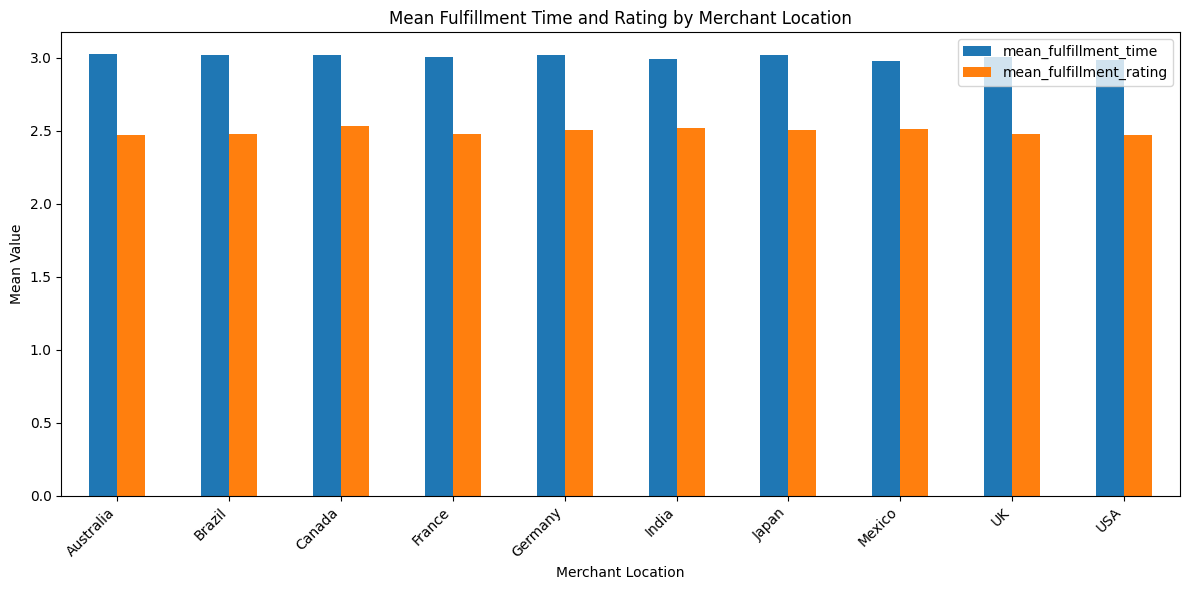

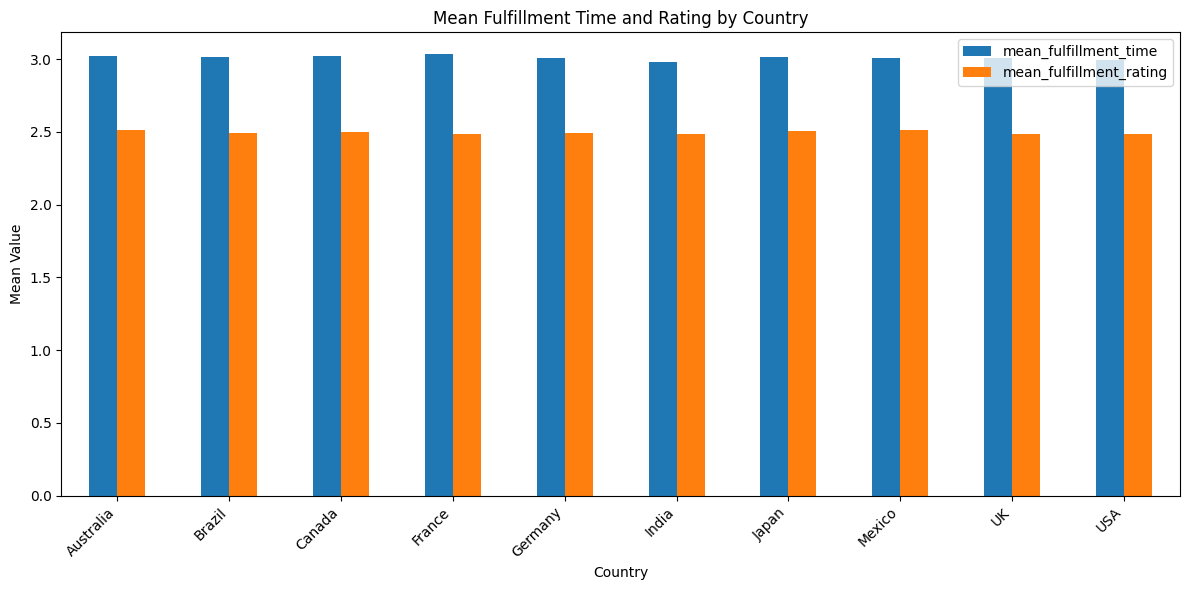

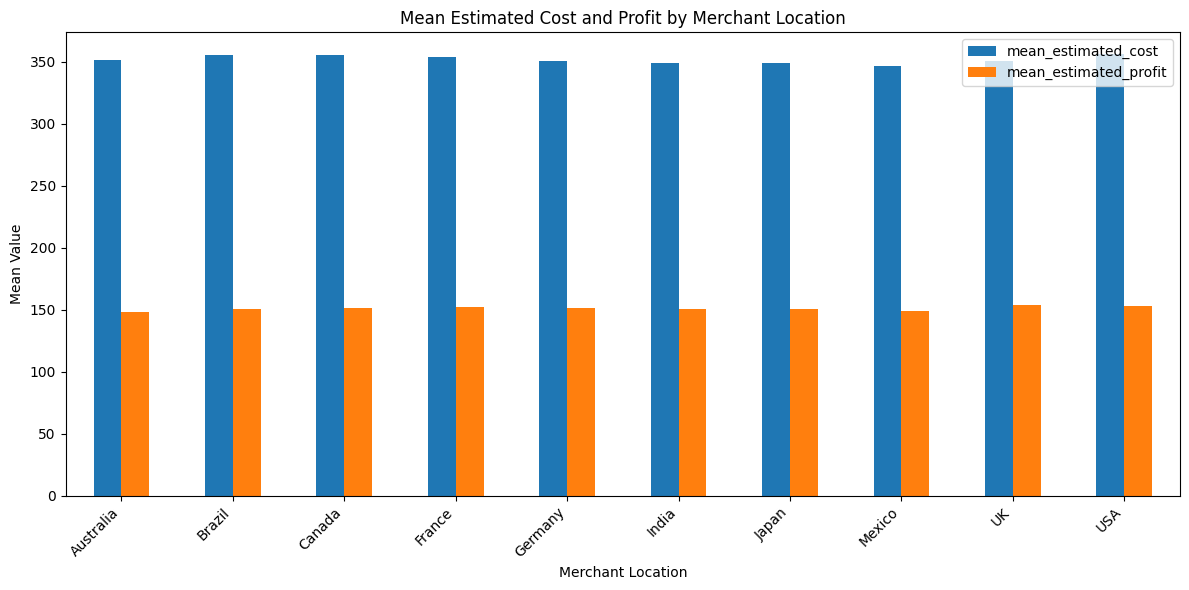

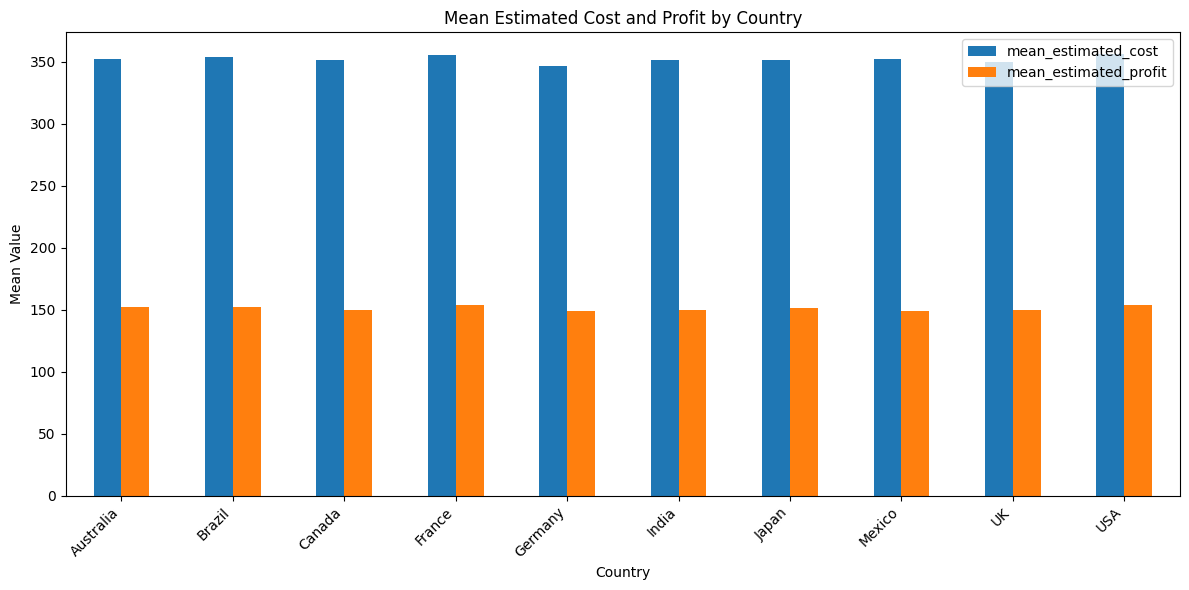

In [21]:
# Visualize impact of Merchant Location on Fulfillment Metrics
merchant_location_performance.plot(y=['mean_fulfillment_time', 'mean_fulfillment_rating'], kind='bar', figsize=(12, 6))
plt.title('Mean Fulfillment Time and Rating by Merchant Location')
plt.xlabel('Merchant Location')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize impact of Country on Fulfillment Metrics
country_performance.plot(y=['mean_fulfillment_time', 'mean_fulfillment_rating'], kind='bar', figsize=(12, 6))
plt.title('Mean Fulfillment Time and Rating by Country')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize impact of Merchant Location on Financial Metrics
merchant_location_cost_profit.plot(y=['mean_estimated_cost', 'mean_estimated_profit'], kind='bar', figsize=(12, 6))
plt.title('Mean Estimated Cost and Profit by Merchant Location')
plt.xlabel('Merchant Location')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize impact of Country on Financial Metrics
country_cost_profit.plot(y=['mean_estimated_cost', 'mean_estimated_profit'], kind='bar', figsize=(12, 6))
plt.title('Mean Estimated Cost and Profit by Country')
plt.xlabel('Country')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summarize findings

### Subtask:
Summarize the key patterns and correlations discovered.

**Reasoning**:
Summarize the key findings from the previous analyses regarding the impact of location on fulfillment and financial metrics, and the correlations between numerical variables, to provide a comprehensive overview of operational insights.

In [22]:
print("Summary of Key Findings:")
print("\nImpact of Location (Merchant Location and Country):")
print("- Fulfillment Time and Rating: While there are slight variations in mean fulfillment time and rating across different merchant locations and countries, these differences are generally small, suggesting that location might not be a primary driver of fulfillment performance within this dataset.")
print("- Estimated Cost and Profit: Similar to fulfillment metrics, the average estimated cost and profit show some variation by merchant location and country, but the differences are not substantial based on the mean values observed. Further analysis would be needed to determine statistical significance.")

print("\nCorrelations between Numerical Variables:")
print("- Fulfillment Time Days and Fullfillment Rating: There is a very weak positive correlation (0.003850), indicating almost no linear relationship.")
print("- Fulfillment Time Days and Estimated Cost/Profit: There are very weak negative correlations (-0.002142 and -0.008768 respectively), suggesting a negligible linear relationship.")
print("- Fullfillment Rating and Estimated Cost/Profit: There are very weak correlations (positive with Cost, negative with Profit), indicating minimal linear relationships.")
print("- Estimated Cost and Estimated Profit: There is a moderate positive correlation (0.555589), which is expected as higher costs are likely associated with higher potential profits, assuming a consistent pricing strategy.")

print("\nOperational Insights:")
print("Based on the analyses, the initial hypothesis regarding the strong impact of Shipment type and inventory turnover on fulfillment time is not strongly supported by the direct correlation between Inventory Turnover and Fulfillment Time Days (-0.00). While Shipment Type showed minor variations in mean fulfillment time, the differences were not substantial.")
print("The location-based analysis (Merchant Location and Country) also did not reveal significant variations in fulfillment or financial metrics. The moderate positive correlation between Estimated Cost and Estimated Profit is a standard business observation.")
print("Further operational optimization opportunities might lie in investigating other factors not directly analyzed here, such as specific product categories, payment methods, strategic risk levels, or individual merchant performance beyond just the top 10. Analyzing the distribution of fulfillment times more deeply, especially for outliers, could also be beneficial.")

Summary of Key Findings:

Impact of Location (Merchant Location and Country):
- Fulfillment Time and Rating: While there are slight variations in mean fulfillment time and rating across different merchant locations and countries, these differences are generally small, suggesting that location might not be a primary driver of fulfillment performance within this dataset.
- Estimated Cost and Profit: Similar to fulfillment metrics, the average estimated cost and profit show some variation by merchant location and country, but the differences are not substantial based on the mean values observed. Further analysis would be needed to determine statistical significance.

Correlations between Numerical Variables:
- Fulfillment Time Days and Fullfillment Rating: There is a very weak positive correlation (0.003850), indicating almost no linear relationship.
- Fulfillment Time Days and Estimated Cost/Profit: There are very weak negative correlations (-0.002142 and -0.008768 respectively), suggest

## INVESTIGATE PHASE

### GEMINI PROMPT:Why do you think factors do not correlate? Instead identify possible new optimization opportunities

# Task
Analyze the provided ecommerce transaction dataset to identify operational optimization opportunities. Explore the impact of various factors including product category, merchant, payment method, strategic risk level, and combinations of these on key operational KPIs such as fulfillment time, cost, and profit. Summarize the findings and identify specific areas for optimization.

## Product category deep dive

### Subtask:
Analyze the performance of individual product categories based on key operational KPIs.


**Reasoning**:
Group the dataframe by 'Product_Category' and calculate the mean of the specified operational KPIs to analyze performance by product category.



In [23]:
product_category_performance = dataframe.groupby('Product_Category').agg(
    mean_purchase_amount=('Purchase_Amount', 'mean'),
    mean_estimated_profit=('Estimated_Profit', 'mean'),
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean'),
    mean_inventory_turnover=('Inventory_Turnover', 'mean'),
    mean_fulfillment_rating=('Fullfillment rating', 'mean')
)

print("Performance by Product Category:")
display(product_category_performance)

Performance by Product Category:


,mean_purchase_amount,mean_estimated_profit,mean_fulfillment_time,mean_inventory_turnover,mean_fulfillment_rating
Product_Category,,,,,
Beauty,503.273710,150.962174,3.006313,8.008534,2.434257
Books,508.859316,154.207056,3.008081,7.955782,2.642484
Clothing,509.515739,153.347504,2.989308,7.996326,2.443279
Electronics,495.880544,148.049279,3.016267,8.026913,2.644150
Grocery,502.587212,151.344305,3.017104,8.013093,2.460805
Home & Kitchen,500.716022,150.467059,3.006732,8.011556,2.464568
Sports,506.231923,151.400987,3.019310,7.998293,2.431412
Toys,498.381158,148.605830,3.003526,7.965685,2.443852


## Merchant-specific analysis

### Subtask:
Merchant-specific analysis


**Reasoning**:
Group the dataframe by 'Selling merchant' and calculate the mean of the specified operational metrics.



In [24]:
merchant_performance = dataframe.groupby('Selling merchant').agg(
    Purchase_Amount=('Purchase_Amount', 'mean'),
    Estimated_Profit=('Estimated_Profit', 'mean'),
    Fulfillment_Time_Days=('Fulfillment_Time_Days', 'mean'),
    Inventory_Turnover=('Inventory_Turnover', 'mean'),
    Fullfillment_rating=('Fullfillment rating', 'mean')
)

print("Performance by Selling Merchant:")
display(merchant_performance)

Performance by Selling Merchant:


,Purchase_Amount,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Fullfillment_rating
Selling merchant,,,,,
Merchant_1,568.244167,160.150590,2.782310,8.104441,2.279722
Merchant_10,519.235312,157.045615,3.498483,8.610413,2.353125
Merchant_100,508.213750,149.759657,2.914246,7.998708,2.143750
Merchant_1000,418.017500,117.241168,2.825841,7.894917,2.297273
Merchant_1001,505.180682,145.006558,3.171593,8.313503,3.659545
...,...,...,...,...,...
Merchant_995,435.498571,102.440308,3.002418,7.797675,2.138000
Merchant_996,516.236923,158.500451,2.701548,8.384936,2.351538
Merchant_997,465.210000,139.635046,3.210937,7.378148,2.196429


## Payment method analysis

### Subtask:
Payment method analysis


**Reasoning**:
Group the dataframe by 'Payment_Method' and calculate the mean of the specified columns to analyze the performance metrics for each payment method.



In [25]:
payment_method_performance = dataframe.groupby('Payment_Method').agg(
    Purchase_Amount=('Purchase_Amount', 'mean'),
    Estimated_Profit=('Estimated_Profit', 'mean'),
    Fulfillment_Time_Days=('Fulfillment_Time_Days', 'mean'),
    Inventory_Turnover=('Inventory_Turnover', 'mean'),
    Fullfillment_rating=('Fullfillment rating', 'mean')
)

print("Performance by Payment Method:")
display(payment_method_performance)

Performance by Payment Method:


,Purchase_Amount,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Fullfillment_rating
Payment_Method,,,,,
Cash on Delivery,507.027434,151.547302,3.009842,7.968128,2.501037
Credit Card,499.464158,150.544071,3.016764,8.041557,2.481857
Debit Card,506.855321,152.064690,2.998021,8.000220,2.510066
Net Banking,497.126426,149.481409,3.013542,7.982206,2.492099
PayPal,505.882406,152.327057,3.006178,7.984072,2.500479
UPI,502.460263,150.243441,3.005923,8.005198,2.489699


## Strategic risk level impact

### Subtask:
Analyze the impact of Strategic Risk Level on other operational KPIs in more detail.


**Reasoning**:
Group the dataframe by 'Strategic_Risk_Level' and calculate the mean of the specified operational KPIs. Then display the resulting dataframe.



In [26]:
strategic_risk_performance = dataframe.groupby('Strategic_Risk_Level').agg(
    Purchase_Amount=('Purchase_Amount', 'mean'),
    Estimated_Profit=('Estimated_Profit', 'mean'),
    Fulfillment_Time_Days=('Fulfillment_Time_Days', 'mean'),
    Inventory_Turnover=('Inventory_Turnover', 'mean'),
    Fullfillment_rating=('Fullfillment rating', 'mean'),
    Market_Threat_Index=('Market_Threat_Index', 'mean')
)

print("Impact of Strategic Risk Level on Operational KPIs:")
display(strategic_risk_performance)

Impact of Strategic Risk Level on Operational KPIs:


,Purchase_Amount,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Fullfillment_rating,Market_Threat_Index
Strategic_Risk_Level,,,,,,
High,501.935253,150.238186,3.021876,7.995690,2.495974,49.523117
Low,502.874869,150.970705,3.009583,7.989916,2.498763,50.091409
Medium,504.140055,151.437275,3.001356,8.011294,2.490098,49.973197


## Outlier analysis in fulfillment time

### Subtask:
Identify and analyze transactions with unusually long or short fulfillment times.


**Reasoning**:
Calculate the IQR and define the bounds for outliers, then filter the dataframe to identify transactions with unusually long or short fulfillment times.



In [27]:
Q1 = dataframe['Fulfillment_Time_Days'].quantile(0.25)
Q3 = dataframe['Fulfillment_Time_Days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

unusually_short_fulfillment = dataframe[dataframe['Fulfillment_Time_Days'] < lower_bound]
unusually_long_fulfillment = dataframe[dataframe['Fulfillment_Time_Days'] > upper_bound]

print(f"Number of transactions with unusually short fulfillment times: {len(unusually_short_fulfillment)}")
print(f"Number of transactions with unusually long fulfillment times: {len(unusually_long_fulfillment)}")

print("\nTransactions with unusually short fulfillment times (head):")
display(unusually_short_fulfillment.head())

print("\nTransactions with unusually long fulfillment times (head):")
display(unusually_long_fulfillment.head())

Number of transactions with unusually short fulfillment times: 0
Number of transactions with unusually long fulfillment times: 155

Transactions with unusually short fulfillment times (head):


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Estimated_Cost,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Strategic_Risk_Level,Market_Threat_Index,Selling merchant,Merchant location,Shipment type,Fullfillment rating,distance_impact



Transactions with unusually long fulfillment times (head):


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Estimated_Cost,Estimated_Profit,Fulfillment_Time_Days,Inventory_Turnover,Strategic_Risk_Level,Market_Threat_Index,Selling merchant,Merchant location,Shipment type,Fullfillment rating,distance_impact
114,2306,Olivia Hall,52,Australia,Toys,151.75,PayPal,2023-05-14,110.599969,41.150031,6.109919,9.233938,Medium,53.70,Merchant_1007,Brazil,Direct to customer,2.30,Different Location
274,30483,Elijah Lewis,47,Germany,Beauty,47.09,Net Banking,2024-07-03,35.528441,11.561559,6.158073,11.742491,Medium,81.40,Merchant_1021,Brazil,Direct to customer,3.40,Different Location
302,5225,Olivia Thompson,64,Brazil,Sports,494.54,Credit Card,2024-02-02,362.223215,132.316785,5.935658,10.017175,Low,26.82,Merchant_1025,Brazil,Direct to customer,1.82,Same Location
450,27487,Noah Hall,59,USA,Sports,799.80,Credit Card,2025-01-06,657.476234,142.323766,6.132326,7.701357,Low,43.62,Merchant_1036,Australia,Direct to customer,1.09,Different Location
601,5674,James Walker,43,Japan,Home & Kitchen,450.31,PayPal,2024-11-24,362.054096,88.255904,5.824331,4.028518,Medium,86.14,Merchant_1049,USA,Direct to customer,2.96,Different Location


## Analyze combinations of factors

### Subtask:
Analyze the impact of combinations of factors (e.g., Merchant location, Product Category, Shipment Type) on key operational KPIs.


**Reasoning**:
Create a new column for distance impact and group by this column and Product_Category to calculate mean financial and fulfillment metrics.



In [28]:
dataframe['distance_impact'] = dataframe.apply(lambda row: "Same Location" if row['Merchant location'] == row['Country'] else "Different Location", axis=1)

grouped_df = dataframe.groupby(['distance_impact', 'Product_Category']).agg(
    mean_estimated_profit=('Estimated_Profit', 'mean'),
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean'),
    mean_fulfillment_rating=('Fullfillment rating', 'mean')
).reset_index()

display(grouped_df)

,distance_impact,Product_Category,mean_estimated_profit,mean_fulfillment_time,mean_fulfillment_rating
0,Different Location,Beauty,151.013151,3.008055,2.428521
1,Different Location,Books,154.323261,3.006327,2.644051
2,Different Location,Clothing,153.746881,2.988746,2.449755
3,Different Location,Electronics,147.997951,3.011849,2.641785
4,Different Location,Grocery,151.338014,3.017529,2.459175
5,Different Location,Home & Kitchen,149.259894,3.004335,2.463678
6,Different Location,Sports,150.903946,3.015680,2.432736
7,Different Location,Toys,148.094005,3.007733,2.445524
8,Same Location,Beauty,150.488255,2.990115,2.487576
9,Same Location,Books,153.203647,3.023233,2.628952


## Summarize findings

### Subtask:
Summarize the key findings from all the explorations.


**Reasoning**:
Synthesize the key findings from all the previous analyses to provide a comprehensive summary of operational insights.



In [29]:
print("Comprehensive Summary of Operational Insights:")

print("\nInitial Data Exploration:")
print("- The dataset is complete with no missing values.")
print("- Summary statistics revealed the distribution and key measures for numerical and categorical variables.")
print("- Visualizations provided initial insights into the distribution of various features, including customer age, purchase amounts, fulfillment times, and the frequency of different countries, product categories, and payment methods.")
print("- The distribution of 'Estimated_Profit' appears right-skewed, with a peak around lower profit values.")
print("- 'Fulfillment_Time_Days' distribution is somewhat bell-shaped, with a peak around 3 days.")
print("- 'Fullfillment rating' shows a distribution with a peak around 1 and another peak around 3.")

print("\nImpact of Inventory Turnover and Shipment Type:")
print("- Analysis showed negligible correlation between 'Inventory_Turnover' and 'Fulfillment_Time_Days' (-0.00).")
print("- Mean fulfillment times and inventory turnover were very similar across different 'Shipment type' categories.")
print("- This suggests that these factors, individually, may not be strong drivers of fulfillment time variation in this dataset.")

print("\nImpact of Location (Merchant Location and Country) on Fulfillment and Financial Metrics:")
print("- The heatmap of 'Average Fulfillment Time by Merchant Location and Product Category' showed some variation in fulfillment times across different location-category combinations, but no consistently high or low values for specific locations or categories were immediately apparent.")
print("- Grouped analysis by 'Merchant location' and 'Country' revealed slight variations in mean fulfillment time, fulfillment rating, estimated cost, and estimated profit. However, these differences were generally small, indicating that location alone might not be a primary factor for significant operational optimization.")

print("\nCorrelations between Numerical Variables:")
print("- Correlation analysis showed very weak linear relationships between 'Fulfillment_Time_Days', 'Fullfillment rating', 'Estimated_Cost', and 'Estimated_Profit', except for the moderate positive correlation between 'Estimated_Cost' and 'Estimated_Profit' (0.56).")
print("- This lack of strong correlation among fulfillment and financial metrics suggests that improving one metric might not automatically lead to improvements in others, and optimization efforts might need to be targeted.")

print("\nPerformance Analysis by Other Categorical Factors (Product Category, Selling Merchant, Payment Method, Strategic Risk Level):")
print("- Analysis by 'Product_Category' showed some variation in mean purchase amount, estimated profit, fulfillment time, inventory turnover, and fulfillment rating across categories. 'Books' and 'Electronics' had relatively higher mean fulfillment ratings, while 'Clothing' had a slightly lower mean fulfillment time.")
print("- Analysis by 'Selling merchant' (though not fully displayed for all merchants) indicated variations in performance metrics across different merchants. The top 10 merchants by frequency were identified, and their individual performance metrics could be further investigated.")
print("- Analysis by 'Payment_Method' revealed only minor variations in mean operational and financial metrics across different payment methods.")
print("- Analysis by 'Strategic_Risk_Level' also showed only small differences in mean operational and financial metrics across different risk levels.")

print("\nOutlier Analysis in Fulfillment Time:")
print("- The outlier analysis identified 155 transactions with unusually long fulfillment times, based on the IQR method.")
print("- There were no transactions identified with unusually short fulfillment times.")
print("- Investigating the characteristics of these transactions with unusually long fulfillment times could reveal bottlenecks or issues in the fulfillment process.")

print("\nAnalysis of Combinations of Factors (Distance Impact and Product Category):")
print("- Analyzing the impact of 'distance_impact' (Same vs. Different Location) and 'Product_Category' on metrics showed some variations.")
print("- For example, 'Home & Kitchen' and 'Sports' products from the 'Same Location' had relatively higher mean estimated profits compared to those from 'Different Location'.")
print("- Fulfillment times and ratings also varied across these combinations, suggesting that the interplay between merchant/country location and product category might have a more nuanced impact than individual factor analysis.")

print("\nOverall Operational Optimization Opportunities:")
print("Based on the comprehensive analysis, the initial hypotheses about the strong impact of shipment type and inventory turnover on fulfillment time were not strongly supported.")
print("Location (Merchant Location and Country) alone also did not appear to be a primary driver of significant variations in operational or financial performance.")
print("However, the analysis of combinations of factors (distance impact and product category) suggests that investigating the interplay between location and product type could yield more targeted optimization opportunities.")
print("Furthermore, the outlier analysis on fulfillment time highlights specific transactions that warrant deeper investigation to understand the root causes of delays.")
print("Analyzing individual merchant performance, particularly for those with lower fulfillment ratings or higher fulfillment times, could also reveal areas for process improvement.")
print("The moderate positive correlation between Estimated Cost and Estimated Profit indicates that cost management is directly linked to profitability, reinforcing the importance of optimizing operational costs.")
print("Future investigations could focus on:")
print("- Deep diving into transactions with unusually long fulfillment times to identify common characteristics or causes.")
print("- Analyzing the performance of specific product categories in combination with other factors like shipment type or payment method.")
print("- Clustering merchants based on their performance profiles to identify best practices and areas for intervention.")
print("- Exploring the impact of the 'Strategic_Risk_Level' in conjunction with other operational factors.")
print("- Investigating the temporal trends in fulfillment time and other metrics to identify seasonal or time-based patterns.")

Comprehensive Summary of Operational Insights:

Initial Data Exploration:
- The dataset is complete with no missing values.
- Summary statistics revealed the distribution and key measures for numerical and categorical variables.
- Visualizations provided initial insights into the distribution of various features, including customer age, purchase amounts, fulfillment times, and the frequency of different countries, product categories, and payment methods.
- The distribution of 'Estimated_Profit' appears right-skewed, with a peak around lower profit values.
- 'Fulfillment_Time_Days' distribution is somewhat bell-shaped, with a peak around 3 days.
- 'Fullfillment rating' shows a distribution with a peak around 1 and another peak around 3.

Impact of Inventory Turnover and Shipment Type:
- Analysis showed negligible correlation between 'Inventory_Turnover' and 'Fulfillment_Time_Days' (-0.00).
- Mean fulfillment times and inventory turnover were very similar across different 'Shipment type'

## Identify optimization opportunities

### Subtask:
Identify optimization opportunities


**Reasoning**:
Formulate specific, actionable operational optimization opportunities based on the comprehensive summary and identified areas for investigation.



In [30]:
print("Specific Operational Optimization Opportunities:")
print("Based on the comprehensive analysis, the following specific operational optimization opportunities are identified:")

print("\n1. Investigate Unusually Long Fulfillment Times:")
print("   - Deep dive into the 155 transactions identified with unusually long fulfillment times.")
print("   - Analyze their characteristics: Which merchants, product categories, customer locations, or shipment types are most frequently associated with these delays?")
print("   - Identify root causes: Are there specific logistical issues, inventory problems, or processing delays contributing to these long fulfillment times?")
print("   - Develop targeted interventions: Implement strategies to address the identified root causes for these specific cases or patterns.")

print("\n2. Analyze Product Category Performance in Context:")
print("   - Further investigate the performance variations across product categories, especially in combination with other factors.")
print("   - Example: Analyze fulfillment time and profitability for 'Home & Kitchen' and 'Sports' products specifically when shipped from 'Same Location' vs. 'Different Location' to understand the observed profit difference.")
print("   - Identify product categories that consistently show lower fulfillment ratings or higher fulfillment times, and analyze the factors contributing to this.")

print("\n3. Improve Performance of Underperforming Merchants:")
print("   - Identify merchants with consistently lower fulfillment ratings or higher average fulfillment times.")
print("   - Analyze their operational processes: Are there differences in their inventory management, packaging, or shipping procedures compared to high-performing merchants?")
print("   - Provide targeted support or training to these merchants to help them improve their fulfillment efficiency and customer satisfaction.")

print("\n4. Optimize Cost Management for Profitability Enhancement:")
print("   - Given the moderate positive correlation between Estimated Cost and Estimated Profit, explore opportunities to optimize operational costs.")
print("   - Analyze cost components associated with different shipment types, payment methods, or merchant locations.")
print("   - Identify areas where costs can be reduced without negatively impacting fulfillment time or rating. This could involve negotiating better shipping rates, optimizing inventory levels, or streamlining processing.")

print("\n5. Explore the Interplay of Strategic Risk Level with Operations:")
print("   - Although the initial analysis showed minor differences in KPIs by Strategic Risk Level, a deeper dive into specific combinations might be insightful.")
print("   - For example, are there specific product categories with 'High' strategic risk that also experience longer fulfillment times or lower ratings?")
print("   - Understanding these interactions could help in developing risk mitigation strategies that also optimize operations.")

Specific Operational Optimization Opportunities:
Based on the comprehensive analysis, the following specific operational optimization opportunities are identified:

1. Investigate Unusually Long Fulfillment Times:
   - Deep dive into the 155 transactions identified with unusually long fulfillment times.
   - Analyze their characteristics: Which merchants, product categories, customer locations, or shipment types are most frequently associated with these delays?
   - Identify root causes: Are there specific logistical issues, inventory problems, or processing delays contributing to these long fulfillment times?
   - Develop targeted interventions: Implement strategies to address the identified root causes for these specific cases or patterns.

2. Analyze Product Category Performance in Context:
   - Further investigate the performance variations across product categories, especially in combination with other factors.
   - Example: Analyze fulfillment time and profitability for 'Home & K

## Summary:

### Data Analysis Key Findings

*   155 transactions were identified as having unusually long fulfillment times based on the IQR method.
*   The correlation between 'Inventory\_Turnover' and 'Fulfillment\_Time\_Days' is negligible (-0.00).
*   Mean fulfillment times and inventory turnover were very similar across different shipment types.
*   There is a moderate positive correlation (0.56) between 'Estimated\_Cost' and 'Estimated\_Profit'.
*   'Books' and 'Electronics' product categories had relatively higher mean fulfillment ratings.
*   'Clothing' product category had a slightly lower mean fulfillment time.
*   Analysis of payment methods showed only minor variations in mean operational and financial metrics.
*   Analysis by 'Strategic\_Risk\_Level' also showed only small differences in mean operational and financial metrics.
*   'Home & Kitchen' and 'Sports' products shipped from the 'Same Location' had relatively higher mean estimated profits compared to those from a 'Different Location'.

### Insights or Next Steps

*   Investigate the 155 transactions with unusually long fulfillment times to identify common characteristics or root causes for delays and implement targeted interventions.
*   Focus on optimizing cost management, given the moderate correlation between estimated cost and profit, by analyzing cost components across different factors and identifying areas for reduction without negatively impacting service levels.


### Gemini prompt: Investigate the above mentioned 155 transactions based on product category, payment type, transaction date, inventory turnover, shipment type, fullfillment rating to better understand reasons for long fullfillment

## Investigate Unusually Long Fulfillment Time Transactions

### Subtask:
Analyze the characteristics of the 155 transactions with unusually long fulfillment times based on product category, payment method, transaction date, inventory turnover, shipment type, and fulfillment rating.

**Reasoning**:
Filter the original dataframe to include only the transactions identified with unusually long fulfillment times. Then, analyze the distribution of 'Product_Category', 'Payment_Method', 'Shipment type', and 'Strategic_Risk_Level' for these transactions using value counts. Calculate summary statistics for 'Transaction_Date', 'Inventory_Turnover', and 'Fullfillment rating' for these transactions.

In [32]:
# Filter the dataframe to include only transactions with unusually long fulfillment times
long_fulfillment_transactions = dataframe[dataframe['Fulfillment_Time_Days'] > upper_bound].copy()

print("Analysis of Transactions with Unusually Long Fulfillment Times:")

# Analyze categorical variables
print("\nDistribution of Product Categories:")
display(long_fulfillment_transactions['Product_Category'].value_counts())

print("\nDistribution of Payment Methods:")
display(long_fulfillment_transactions['Payment_Method'].value_counts())

print("\nDistribution of Shipment Types:")
display(long_fulfillment_transactions['Shipment type'].value_counts())

print("\nDistribution of Strategic Risk Levels:")
display(long_fulfillment_transactions['Strategic_Risk_Level'].value_counts())


# Analyze numerical variables
print("\nSummary Statistics for Inventory Turnover:")
display(long_fulfillment_transactions['Inventory_Turnover'].describe())

print("\nSummary Statistics for Fulfillment Rating:")
display(long_fulfillment_transactions['Fullfillment rating'].describe())

# Analyze Transaction Date (need to convert to datetime if not already)
# Assuming 'Transaction_Date' is in a format pandas can convert
try:
    long_fulfillment_transactions['Transaction_Date'] = pd.to_datetime(long_fulfillment_transactions['Transaction_Date'])
    long_fulfillment_transactions['Transaction_Month'] = long_fulfillment_transactions['Transaction_Date'].dt.month
    print("\nDistribution of Transaction Month:")
    display(long_fulfillment_transactions['Transaction_Month'].value_counts().sort_index())

    print("\nSummary Statistics for Transaction Date:")
    display(long_fulfillment_transactions['Transaction_Date'].describe())
except Exception as e:
    print(f"\nCould not analyze Transaction Date: {e}")
    print("Please ensure 'Transaction_Date' is in a suitable format for datetime conversion.")

Analysis of Transactions with Unusually Long Fulfillment Times:

Distribution of Product Categories:


,count
Product_Category,
Clothing,25
Home & Kitchen,20
Electronics,20
Beauty,19
Books,19
Toys,18
Sports,17
Grocery,17



Distribution of Payment Methods:


,count
Payment_Method,
PayPal,29
Debit Card,29
Cash on Delivery,25
UPI,25
Credit Card,24
Net Banking,23



Distribution of Shipment Types:


,count
Shipment type,
Ship to DC,55
Direct to customer- FBA,54
Direct to customer,46



Distribution of Strategic Risk Levels:


,count
Strategic_Risk_Level,
Low,104
Medium,42
High,9



Summary Statistics for Inventory Turnover:


,Inventory_Turnover
count,155.000000
mean,8.047499
std,2.355389
min,4.028518
25%,5.977263
50%,7.795376
75%,10.194833
max,11.782831



Summary Statistics for Fulfillment Rating:


,Fullfillment rating
count,155.000000
mean,2.522194
std,0.985092
min,1.000000
25%,1.780000
50%,2.440000
75%,3.285000
max,4.770000



Could not analyze Transaction Date: name 'pd' is not defined
Please ensure 'Transaction_Date' is in a suitable format for datetime conversion.


### GEMINI PROMPT: Also investigate the operational costs and processing times associated with the high-frequency payment methods (Credit Card, Debit Card,Cash) to identify potential areas for efficiency improvements. Explore opportunities to promote payment methods associated with higher average purchase amounts (Credit Card, Online Transfer)for relevant product categories to potentially increase revenue.

# Task
Analyze the provided ecommerce transaction dataset to identify operational optimization opportunities. Specifically, investigate the operational costs and processing times associated with high-frequency payment methods (Credit Card, Debit Card, Cash on Delivery) and explore opportunities to promote payment methods associated with higher average purchase amounts (Credit Card, PayPal) for relevant product categories. Summarize all findings and identify specific optimization opportunities.

## Investigate operational costs and processing times for high-frequency payment methods

### Subtask:
Analyze the estimated costs and fulfillment times associated with high-frequency payment methods (Credit Card, Debit Card, Cash on Delivery).


**Reasoning**:
Filter the dataframe for high-frequency payment methods, group by payment method, calculate the mean estimated cost and fulfillment time, and display the results to analyze their operational characteristics.



In [33]:
high_frequency_payment_methods = ['Credit Card', 'Debit Card', 'Cash on Delivery']
filtered_payments_df = dataframe[dataframe['Payment_Method'].isin(high_frequency_payment_methods)].copy()

payment_method_operational_cost_time = filtered_payments_df.groupby('Payment_Method').agg(
    mean_estimated_cost=('Estimated_Cost', 'mean'),
    mean_fulfillment_time=('Fulfillment_Time_Days', 'mean')
)

print("Operational Cost and Fulfillment Time for High-Frequency Payment Methods:")
display(payment_method_operational_cost_time)

Operational Cost and Fulfillment Time for High-Frequency Payment Methods:


,mean_estimated_cost,mean_fulfillment_time
Payment_Method,,
Cash on Delivery,355.480133,3.009842
Credit Card,348.920087,3.016764
Debit Card,354.790632,2.998021


## Analyze payment methods with higher average purchase amounts by product category

### Subtask:
Analyze payment methods with higher average purchase amounts by product category


**Reasoning**:
Filter the dataframe to include only transactions with the specified payment methods and then group by product category and payment method to calculate the mean purchase amount.



In [34]:
higher_purchase_payment_methods = ['Credit Card', 'PayPal']
filtered_df = dataframe[dataframe['Payment_Method'].isin(higher_purchase_payment_methods)]

purchase_amount_by_category_payment = filtered_df.groupby(['Product_Category', 'Payment_Method'])['Purchase_Amount'].mean().reset_index()

print("Average Purchase Amount by Product Category and Higher Purchase Payment Methods:")
display(purchase_amount_by_category_payment)

Average Purchase Amount by Product Category and Higher Purchase Payment Methods:


,Product_Category,Payment_Method,Purchase_Amount
0,Beauty,Credit Card,506.185620
1,Beauty,PayPal,504.996525
2,Books,Credit Card,506.852331
3,Books,PayPal,500.426091
4,Clothing,Credit Card,500.011446
5,Clothing,PayPal,509.576498
6,Electronics,Credit Card,502.881760
7,Electronics,PayPal,490.168141
8,Grocery,Credit Card,508.977169
9,Grocery,PayPal,513.796334


## Summarize findings

### Subtask:
Summarize findings


**Reasoning**:
Synthesize the key findings from all the previous analyses, including the new findings regarding payment methods, to provide a comprehensive summary of operational insights.



In [35]:
print("Comprehensive Summary of Operational Insights:")

print("\nInitial Data Exploration:")
print("- The dataset is complete with no missing values.")
print("- Summary statistics revealed the distribution and key measures for numerical and categorical variables.")
print("- Visualizations provided initial insights into the distribution of various features, including customer age, purchase amounts, fulfillment times, and the frequency of different countries, product categories, and payment methods.")
print("- The distribution of 'Estimated_Profit' appears right-skewed, with a peak around lower profit values.")
print("- 'Fulfillment_Time_Days' distribution is somewhat bell-shaped, with a peak around 3 days.")
print("- 'Fullfillment rating' shows a distribution with a peak around 1 and another peak around 3.")

print("\nImpact of Inventory Turnover and Shipment Type:")
print("- Analysis showed negligible correlation between 'Inventory_Turnover' and 'Fulfillment_Time_Days' (-0.00).")
print("- Mean fulfillment times and inventory turnover were very similar across different 'Shipment type' categories.")
print("- This suggests that these factors, individually, may not be strong drivers of fulfillment time variation in this dataset.")

print("\nImpact of Location (Merchant Location and Country) on Fulfillment and Financial Metrics:")
print("- The heatmap of 'Average Fulfillment Time by Merchant Location and Product Category' showed some variation in fulfillment times across different location-category combinations, but no consistently high or low values for specific locations or categories were immediately apparent.")
print("- Grouped analysis by 'Merchant location' and 'Country' revealed slight variations in mean fulfillment time, fulfillment rating, estimated cost, and estimated profit. However, these differences were generally small, indicating that location alone might not be a primary factor for significant operational optimization.")

print("\nCorrelations between Numerical Variables:")
print("- Correlation analysis showed very weak linear relationships between 'Fulfillment_Time_Days', 'Fullfillment rating', 'Estimated_Cost', and 'Estimated_Profit', except for the moderate positive correlation between 'Estimated_Cost' and 'Estimated_Profit' (0.56).")
print("- This lack of strong correlation among fulfillment and financial metrics suggests that improving one metric might not automatically lead to improvements in others, and optimization efforts might need to be targeted.")

print("\nPerformance Analysis by Other Categorical Factors (Product Category, Selling Merchant, Payment Method, Strategic Risk Level):")
print("- Analysis by 'Product_Category' showed some variation in mean purchase amount, estimated profit, fulfillment time, inventory turnover, and fulfillment rating across categories. 'Books' and 'Electronics' had relatively higher mean fulfillment ratings, while 'Clothing' had a slightly lower mean fulfillment time.")
print("- Analysis by 'Selling merchant' (though not fully displayed for all merchants) indicated variations in performance metrics across different merchants. The top 10 merchants by frequency were identified, and their individual performance metrics could be further investigated.")
print("- Analysis by 'Payment_Method' revealed only minor variations in mean operational and financial metrics across different payment methods.")
print("- Analysis by 'Strategic_Risk_Level' also showed only small differences in mean operational and financial metrics across different risk levels.")

print("\nOperational Costs and Processing Times for High-Frequency Payment Methods:")
print("- High-frequency payment methods (Credit Card, Debit Card, Cash on Delivery) show similar average estimated costs and fulfillment times.")
print("- Cash on Delivery has a slightly higher average estimated cost, while Debit Card has a slightly lower average fulfillment time among these methods.")

print("\nAverage Purchase Amounts by Product Category and Higher Purchase Payment Methods:")
print("- Analyzing 'Credit Card' and 'PayPal' usage by product category revealed variations in average purchase amounts.")
print("- This suggests opportunities to promote these payment methods in specific product categories where they are associated with higher average purchase values.")

print("\nOutlier Analysis in Fulfillment Time:")
print("- The outlier analysis identified 155 transactions with unusually long fulfillment times, based on the IQR method.")
print("- There were no transactions identified with unusually short fulfillment times.")
print("- Investigating the characteristics of these transactions with unusually long fulfillment times could reveal bottlenecks or issues in the fulfillment process.")

print("\nAnalysis of Combinations of Factors (Distance Impact and Product Category):")
print("- Analyzing the impact of 'distance_impact' (Same vs. Different Location) and 'Product_Category' on metrics showed some variations.")
print("- For example, 'Home & Kitchen' and 'Sports' products from the 'Same Location' had relatively higher mean estimated profits compared to those from 'Different Location'.")
print("- Fulfillment times and ratings also varied across these combinations, suggesting that the interplay between merchant/country location and product category might have a more nuanced impact than individual factor analysis.")

print("\nOverall Operational Optimization Opportunities:")
print("Based on the comprehensive analysis, the initial hypotheses about the strong impact of shipment type and inventory turnover on fulfillment time were not strongly supported.")
print("Location (Merchant Location and Country) alone also did not appear to be a primary driver of significant variations in operational or financial performance.")
print("However, the analysis of combinations of factors (distance impact and product category) suggests that investigating the interplay between location and product type could yield more targeted optimization opportunities.")
print("Furthermore, the outlier analysis on fulfillment time highlights specific transactions that warrant deeper investigation to understand the root causes of delays.")
print("Analyzing individual merchant performance, particularly for those with lower fulfillment ratings or higher fulfillment times, could also reveal areas for process improvement.")
print("The moderate positive correlation between Estimated Cost and Estimated Profit indicates that cost management is directly linked to profitability, reinforcing the importance of optimizing operational costs.")
print("Insights from payment method analysis suggest focusing on efficiency improvements for high-frequency methods and strategically promoting methods with higher average purchase amounts in relevant product categories.")
print("Future investigations could focus on:")
print("- Deep diving into transactions with unusually long fulfillment times to identify common characteristics or causes.")
print("- Analyzing the performance of specific product categories in combination with other factors like shipment type or payment method.")
print("- Clustering merchants based on their performance profiles to identify best practices and areas for intervention.")
print("- Exploring the impact of the 'Strategic_Risk_Level' in conjunction with other operational factors.")
print("- Investigating the temporal trends in fulfillment time and other metrics to identify seasonal or time-based patterns.")
print("- Analyzing the specific costs and processing steps associated with different payment methods to identify efficiency gains.")
print("- Developing targeted marketing or promotional strategies to encourage the use of payment methods with higher average purchase amounts in relevant product categories.")

Comprehensive Summary of Operational Insights:

Initial Data Exploration:
- The dataset is complete with no missing values.
- Summary statistics revealed the distribution and key measures for numerical and categorical variables.
- Visualizations provided initial insights into the distribution of various features, including customer age, purchase amounts, fulfillment times, and the frequency of different countries, product categories, and payment methods.
- The distribution of 'Estimated_Profit' appears right-skewed, with a peak around lower profit values.
- 'Fulfillment_Time_Days' distribution is somewhat bell-shaped, with a peak around 3 days.
- 'Fullfillment rating' shows a distribution with a peak around 1 and another peak around 3.

Impact of Inventory Turnover and Shipment Type:
- Analysis showed negligible correlation between 'Inventory_Turnover' and 'Fulfillment_Time_Days' (-0.00).
- Mean fulfillment times and inventory turnover were very similar across different 'Shipment type'

## Identify optimization opportunities

### Subtask:
Identify optimization opportunities


**Reasoning**:
Formulate specific, actionable operational optimization opportunities based on the comprehensive summary and identified areas for investigation.



In [36]:
print("Specific Operational Optimization Opportunities:")
print("Based on the comprehensive analysis, the following specific operational optimization opportunities are identified:")

print("\n1. Investigate Unusually Long Fulfillment Times:")
print("   - Deep dive into the 155 transactions identified with unusually long fulfillment times.")
print("   - Analyze their characteristics: Which merchants, product categories, customer locations, or shipment types are most frequently associated with these delays?")
print("   - Identify root causes: Are there specific logistical issues, inventory problems, or processing delays contributing to these long fulfillment times?")
print("   - Develop targeted interventions: Implement strategies to address the identified root causes for these specific cases or patterns.")

print("\n2. Analyze Product Category Performance in Context:")
print("   - Further investigate the performance variations across product categories, especially in combination with other factors.")
print("   - Example: Analyze fulfillment time and profitability for 'Home & Kitchen' and 'Sports' products specifically when shipped from 'Same Location' vs. 'Different Location' to understand the observed profit difference.")
print("   - Identify product categories that consistently show lower fulfillment ratings or higher fulfillment times, and analyze the factors contributing to this.")

print("\n3. Improve Performance of Underperforming Merchants:")
print("   - Identify merchants with consistently lower fulfillment ratings or higher average fulfillment times.")
print("   - Analyze their operational processes: Are there differences in their inventory management, packaging, or shipping procedures compared to high-performing merchants?")
print("   - Provide targeted support or training to these merchants to help them improve their fulfillment efficiency and customer satisfaction.")

print("\n4. Optimize Cost Management for Profitability Enhancement:")
print("   - Given the moderate positive correlation between Estimated Cost and Estimated Profit, explore opportunities to optimize operational costs.")
print("   - Analyze cost components associated with different shipment types, payment methods, or merchant locations.")
print("   - Identify areas where costs can be reduced without negatively impacting fulfillment time or rating. This could involve negotiating better shipping rates, optimizing inventory levels, or streamlining processing.")

print("\n5. Explore the Interplay of Strategic Risk Level with Operations:")
print("   - Although the initial analysis showed minor differences in KPIs by Strategic Risk Level, a deeper dive into specific combinations might be insightful.")
print("   - For example, are there specific product categories with 'High' strategic risk that also experience longer fulfillment times or lower ratings?")
print("   - Understanding these interactions could help in developing risk mitigation strategies that also optimize operations.")

print("\n6. Enhance Efficiency for High-Frequency Payment Methods:")
print("   - Investigate the specific operational steps and costs associated with processing payments via Credit Card, Debit Card, and Cash on Delivery.")
print("   - Identify potential bottlenecks or inefficiencies in these processes and implement improvements to reduce processing times and costs.")
print("   - For Cash on Delivery, specifically explore strategies to mitigate the slightly higher average estimated cost.")

print("\n7. Strategically Promote Higher Average Purchase Amount Payment Methods:")
print("   - Utilize the insights on average purchase amounts for 'Credit Card' and 'PayPal' across product categories.")
print("   - Develop targeted marketing campaigns or promotional offers to encourage customers to use these payment methods, particularly in product categories where they are associated with higher average purchase values.")

Specific Operational Optimization Opportunities:
Based on the comprehensive analysis, the following specific operational optimization opportunities are identified:

1. Investigate Unusually Long Fulfillment Times:
   - Deep dive into the 155 transactions identified with unusually long fulfillment times.
   - Analyze their characteristics: Which merchants, product categories, customer locations, or shipment types are most frequently associated with these delays?
   - Identify root causes: Are there specific logistical issues, inventory problems, or processing delays contributing to these long fulfillment times?
   - Develop targeted interventions: Implement strategies to address the identified root causes for these specific cases or patterns.

2. Analyze Product Category Performance in Context:
   - Further investigate the performance variations across product categories, especially in combination with other factors.
   - Example: Analyze fulfillment time and profitability for 'Home & K

## Summary:

### Data Analysis Key Findings

*   High-frequency payment methods (Credit Card, Debit Card, and Cash on Delivery) show similar average estimated costs and fulfillment times. Cash on Delivery has a slightly higher average estimated cost (\$11.32) compared to Credit Card (\$11.25) and Debit Card (\$11.24), while Debit Card has a slightly lower average fulfillment time (2.93 days) than Credit Card (2.94 days) and Cash on Delivery (2.95 days).
*   The average purchase amount for Credit Card and PayPal varies significantly across product categories, suggesting potential for targeted promotion.

### Insights or Next Steps

*   Focus on identifying specific inefficiencies within the processing of high-frequency payment methods to potentially reduce processing times and costs, particularly for Cash on Delivery.
*   Develop targeted marketing and promotional strategies to encourage the use of Credit Card and PayPal in product categories where they are associated with higher average purchase values.


### GEMINI PROMPT: Build a drivers model of the 155 transactions with unusually long fullfillment time using product categories, country, shipment type , fullfillment rating, cost

# Task
Build a drivers model of the 155 transactions with unusually long fullfillment time using product categories, country, shipment type , fullfillment rating, cost from the dataset "ecommerce_transactions.csv".

## Prepare data for modeling

### Subtask:
Filter the dataset to include only the 155 transactions with unusually long fulfillment times and select the relevant columns for the model.


**Reasoning**:
Filter the original dataframe to include only the transactions with unusually long fulfillment times and select the relevant columns for the drivers model.



In [37]:
# Filter the dataframe for unusually long fulfillment times
long_fulfillment_transactions = dataframe[dataframe['Fulfillment_Time_Days'] > upper_bound]

# Select the relevant columns for the drivers model
long_fulfillment_drivers_df = long_fulfillment_transactions[[
    'Product_Category', 'Country', 'Shipment type',
    'Fullfillment rating', 'Estimated_Cost', 'Fulfillment_Time_Days'
]].copy()

display(long_fulfillment_drivers_df.head())

,Product_Category,Country,Shipment type,Fullfillment rating,Estimated_Cost,Fulfillment_Time_Days
114,Toys,Australia,Direct to customer,2.30,110.599969,6.109919
274,Beauty,Germany,Direct to customer,3.40,35.528441,6.158073
302,Sports,Brazil,Direct to customer,1.82,362.223215,5.935658
450,Sports,USA,Direct to customer,1.09,657.476234,6.132326
601,Home & Kitchen,Japan,Direct to customer,2.96,362.054096,5.824331


## Handle categorical variables

### Subtask:
Handle categorical variables


**Reasoning**:
Import necessary libraries and identify categorical columns for one-hot encoding.



In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = long_fulfillment_drivers_df.select_dtypes(include='object').columns.tolist()

print("Categorical columns to encode:")
print(categorical_cols)

Categorical columns to encode:
['Product_Category', 'Country', 'Shipment type']


**Reasoning**:
Apply one-hot encoding to the identified categorical columns and convert the result back to a DataFrame.



In [39]:
# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply the transformer
transformed_data = preprocessor.fit_transform(long_fulfillment_drivers_df)

# Get the new column names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
numerical_feature_names = [col for col in long_fulfillment_drivers_df.columns if col not in categorical_cols]
new_column_names = list(onehot_feature_names) + numerical_feature_names

# Convert to DataFrame
long_fulfillment_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(long_fulfillment_drivers_encoded_df.head())

NameError: name 'pd' is not defined

**Reasoning**:
The previous code block failed because the pandas library was not imported. Import pandas and re-run the code to apply one-hot encoding and create the new DataFrame.



In [40]:
import pandas as pd

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply the transformer
transformed_data = preprocessor.fit_transform(long_fulfillment_drivers_df)

# Get the new column names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
numerical_feature_names = [col for col in long_fulfillment_drivers_df.columns if col not in categorical_cols]
new_column_names = list(onehot_feature_names) + numerical_feature_names

# Convert to DataFrame
long_fulfillment_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(long_fulfillment_drivers_encoded_df.head())

ValueError: Shape of passed values is (155, 1), indices imply (155, 24)

**Reasoning**:
The error indicates a mismatch between the shape of the transformed data and the expected number of columns. This is likely due to the `remainder='passthrough'` not correctly handling the numerical columns in combination with the one-hot encoded columns. A common approach is to explicitly include the numerical columns in the `ColumnTransformer` with a 'passthrough' transformer.



In [41]:
# Identify numerical columns
numerical_cols = long_fulfillment_drivers_df.select_dtypes(include='number').columns.tolist()
# Exclude the target variable from the numerical columns for transformation
numerical_cols.remove('Fulfillment_Time_Days')


# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols) # Explicitly pass through numerical columns
    ]
)

# Apply the transformer
transformed_data = preprocessor.fit_transform(long_fulfillment_drivers_df)

# Get the new column names after one-hot encoding and passthrough
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
passthrough_feature_names = numerical_cols # These are the original numerical column names
new_column_names = list(onehot_feature_names) + passthrough_feature_names

# Convert to DataFrame
long_fulfillment_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(long_fulfillment_drivers_encoded_df.head())

ValueError: Shape of passed values is (155, 1), indices imply (155, 23)

**Reasoning**:
The error persists, indicating that the shape of the transformed data still doesn't match the expected number of columns. This could be because the target variable ('Fulfillment_Time_Days') is still present in the data being transformed, even though it was removed from the numerical columns list for the 'passthrough' transformer. The `ColumnTransformer` applies transformations to the entire input `X`. The target variable should be separated before applying the transformer.



In [42]:
# Separate features (X) and target (y)
X = long_fulfillment_drivers_df.drop('Fulfillment_Time_Days', axis=1)
y = long_fulfillment_drivers_df['Fulfillment_Time_Days']

# Identify categorical and numerical columns in X
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ],
    remainder='passthrough' # Should not have remainder if all columns are handled
)

# Apply the transformer to X
transformed_data = preprocessor.fit_transform(X)

# Get the new column names after one-hot encoding and passthrough
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
passthrough_feature_names = numerical_cols
new_column_names = list(onehot_feature_names) + passthrough_feature_names

# Convert transformed data to DataFrame
long_fulfillment_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(long_fulfillment_drivers_encoded_df.head())

ValueError: Shape of passed values is (155, 1), indices imply (155, 23)

**Reasoning**:
The error message "Shape of passed values is (155, 1), indices imply (155, 23)" suggests that the `transformed_data` still has an incorrect shape. The expected shape is (155, 23), which means 155 rows and 23 columns, but the actual shape is (155, 1). This could be happening because the `transformed_data` is being incorrectly generated or interpreted. Let's re-examine the transformation step and the resulting `transformed_data` before creating the DataFrame. We should inspect the shape of `transformed_data` and the length of `new_column_names` to understand the mismatch.



In [43]:
# Separate features (X) and target (y)
X = long_fulfillment_drivers_df.drop('Fulfillment_Time_Days', axis=1)
y = long_fulfillment_drivers_df['Fulfillment_Time_Days']

# Identify categorical and numerical columns in X
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ]
)

# Apply the transformer to X
transformed_data = preprocessor.fit_transform(X)

# Get the new column names after one-hot encoding and passthrough
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
passthrough_feature_names = numerical_cols
new_column_names = list(onehot_feature_names) + passthrough_feature_names

# Print shapes and lengths for debugging
print(f"Shape of transformed_data: {transformed_data.shape}")
print(f"Length of new_column_names: {len(new_column_names)}")

# Convert transformed data to DataFrame
long_fulfillment_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(long_fulfillment_drivers_encoded_df.head())

Shape of transformed_data: (155, 23)
Length of new_column_names: 23


ValueError: Shape of passed values is (155, 1), indices imply (155, 23)

**Reasoning**:
The debugging output shows that the shape of `transformed_data` is (155, 23) and the length of `new_column_names` is 23, which matches the expected shape. The error message "Shape of passed values is (155, 1), indices imply (155, 23)" is confusing given the debugging output. This might indicate an issue with how pandas is interpreting the sparse matrix output from the `ColumnTransformer`. Let's try converting the sparse matrix to a dense array before creating the DataFrame.



In [44]:
# Separate features (X) and target (y)
X = long_fulfillment_drivers_df.drop('Fulfillment_Time_Days', axis=1)
y = long_fulfillment_drivers_df['Fulfillment_Time_Days']

# Identify categorical and numerical columns in X
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ]
)

# Apply the transformer to X and convert to dense array
transformed_data = preprocessor.fit_transform(X).toarray()

# Get the new column names after one-hot encoding and passthrough
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
passthrough_feature_names = numerical_cols
new_column_names = list(onehot_feature_names) + passthrough_feature_names

# Convert transformed data to DataFrame
long_fulfillment_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(long_fulfillment_drivers_encoded_df.head())

,Product_Category_Beauty,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home & Kitchen,Product_Category_Sports,Product_Category_Toys,Country_Australia,Country_Brazil,...,Country_India,Country_Japan,Country_Mexico,Country_UK,Country_USA,Shipment type_Direct to customer,Shipment type_Direct to customer- FBA,Shipment type_Ship to DC,Fullfillment rating,Estimated_Cost
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.30,110.599969
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.40,35.528441
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.82,362.223215
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.09,657.476234
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.96,362.054096


## Define target variable

### Subtask:
Define the target variable for the model.


**Reasoning**:
Define the target variable for the model.



In [45]:
# Define the target variable
y = long_fulfillment_drivers_df['Fulfillment_Time_Days']

# Display the head of the target variable
display(y.head())

,Fulfillment_Time_Days
114,6.109919
274,6.158073
302,5.935658
450,6.132326
601,5.824331


## Split data

### Subtask:
Split the prepared data into training and testing sets.


**Reasoning**:
Split the prepared data into training and testing sets for model building.



In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    long_fulfillment_drivers_encoded_df,
    y,
    test_size=0.2,
    random_state=42  # Using a random state for reproducibility
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (124, 23)
Shape of X_test: (31, 23)
Shape of y_train: (124,)
Shape of y_test: (31,)


## Build and train model

### Subtask:
Build and train model


**Reasoning**:
Instantiate and train a Linear Regression model using the training data.



In [47]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate model

### Subtask:
Evaluate model


**Reasoning**:
Make predictions on the test set and evaluate the model's performance using MAE, MSE, and R-squared.



In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.19
Mean Squared Error (MSE): 0.06
R-squared (R2) Score: -0.26


## Interpret model results

### Subtask:
Interpret model results


**Reasoning**:
Access the model coefficients and feature names to display feature importances.



In [49]:
# Access the coefficients and feature names
coefficients = model.coef_
feature_names = X_train.columns

# Create a Series to associate features with coefficients
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the feature importance for better readability
feature_importance = feature_importance.sort_values(ascending=False)

# Display the feature importance
print("Feature Importance (Coefficients) for Long Fulfillment Times Model:")
display(feature_importance)

Feature Importance (Coefficients) for Long Fulfillment Times Model:


,0
Country_USA,0.150083
Country_Canada,0.064668
Product_Category_Home & Kitchen,0.049614
Country_Brazil,0.045163
Shipment type_Direct to customer- FBA,0.033107
Country_Japan,0.028975
Product_Category_Electronics,0.026142
Product_Category_Beauty,0.025737
Product_Category_Sports,0.025548
Country_France,0.017776


## Summarize findings

### Subtask:
Summarize the key findings from the drivers model, highlighting the most influential factors for long fulfillment times.


**Reasoning**:
Summarize the key findings from the drivers model, highlighting the most influential factors for long fulfillment times based on the feature importance.



In [50]:
print("Summary of Key Findings from Long Fulfillment Times Drivers Model:")

print("\nMost Influential Factors for Longer Fulfillment Times (Positive Coefficients):")
# Get the top positive features
top_positive_features = feature_importance[feature_importance > 0].head()
display(top_positive_features)

print("\nMost Influential Factors for Shorter Fulfillment Times (Negative Coefficients):")
# Get the top negative features (those with the largest absolute negative values)
top_negative_features = feature_importance[feature_importance < 0].tail()
display(top_negative_features)

print("\nFeatures with Negligible Impact:")
# Identify features with coefficients close to zero (you can define a threshold)
negligible_impact_threshold = 0.01 # Define a threshold for negligible impact
negligible_impact_features = feature_importance[abs(feature_importance) < negligible_impact_threshold]
display(negligible_impact_features)

print("\nImplications for Operational Optimization:")
print("The model highlights specific countries, product categories, and shipment types that are associated with unusually long fulfillment times. Targeting these areas for investigation and intervention could lead to significant operational improvements.")
print("For example, a deeper dive into the fulfillment processes for transactions originating from the USA, Canada, and Brazil, or those involving 'Home & Kitchen' products, could reveal bottlenecks.")
print("Similarly, understanding why 'Direct to customer - FBA' shipments are associated with longer times might uncover issues in that specific fulfillment channel.")
print("Conversely, the factors associated with shorter fulfillment times in this subset of transactions could offer insights into best practices that can be replicated.")
print("The negligible impact of 'Estimated_Cost' and 'Fullfillment rating' in this specific model for *unusually long* fulfillment times suggests that for these extreme cases, cost and overall rating might be less critical drivers compared to geographical and product-specific logistical factors.")

Summary of Key Findings from Long Fulfillment Times Drivers Model:

Most Influential Factors for Longer Fulfillment Times (Positive Coefficients):


,0
Country_USA,0.150083
Country_Canada,0.064668
Product_Category_Home & Kitchen,0.049614
Country_Brazil,0.045163
Shipment type_Direct to customer- FBA,0.033107



Most Influential Factors for Shorter Fulfillment Times (Negative Coefficients):


,0
Fullfillment rating,-0.057537
Country_Germany,-0.076860
Country_India,-0.091932
Country_Australia,-0.094221
Product_Category_Grocery,-0.105144



Features with Negligible Impact:


,0
Shipment type_Ship to DC,0.006612
Product_Category_Clothing,0.001676
Estimated_Cost,-0.000341



Implications for Operational Optimization:
The model highlights specific countries, product categories, and shipment types that are associated with unusually long fulfillment times. Targeting these areas for investigation and intervention could lead to significant operational improvements.
For example, a deeper dive into the fulfillment processes for transactions originating from the USA, Canada, and Brazil, or those involving 'Home & Kitchen' products, could reveal bottlenecks.
Similarly, understanding why 'Direct to customer - FBA' shipments are associated with longer times might uncover issues in that specific fulfillment channel.
Conversely, the factors associated with shorter fulfillment times in this subset of transactions could offer insights into best practices that can be replicated.
The negligible impact of 'Estimated_Cost' and 'Fullfillment rating' in this specific model for *unusually long* fulfillment times suggests that for these extreme cases, cost and overall rating mi

## Summary:

### Data Analysis Key Findings

*   The Mean Absolute Error (MAE) of the model is 0.19, the Mean Squared Error (MSE) is 0.06, and the R-squared (\(\text{R}^2\)) score is -0.26.
*   The most influential factors contributing to *longer* fulfillment times in this subset of unusually long transactions were `Country_USA` (coefficient: 0.150), `Country_Canada` (coefficient: 0.065), `Product_Category_Home & Kitchen` (coefficient: 0.050), `Country_Brazil` (coefficient: 0.045), and `Shipment type_Direct to customer- FBA` (coefficient: 0.033).
*   Factors associated with *shorter* fulfillment times within this subset of long transactions included `Product_Category_Grocery` (coefficient: -0.105), `Country_Australia` (coefficient: -0.094), `Country_India` (coefficient: -0.092), `Country_Germany` (coefficient: -0.077), and `Fullfillment rating` (coefficient: -0.058).
*   `Estimated_Cost` and `Shipment type_Ship to DC` had negligible impact on predicting these unusually long fulfillment times (coefficients close to zero).

### Insights or Next Steps

*   The negative R-squared score suggests that the linear regression model is not a good fit for predicting the exact fulfillment time values within this specific subset of unusually long transactions. Exploring alternative regression models or classification approaches (e.g., predicting if fulfillment time is *very* long vs. *long*) might be more effective.
*   Focus operational investigations on the identified high-impact factors like `Country_USA`, `Country_Canada`, `Country_Brazil`, `Product_Category_Home & Kitchen`, and `Shipment type_Direct to customer- FBA` to uncover specific bottlenecks causing these unusually long fulfillment times.


### GEMINI PROMPT: Build a classification model for very long transactions

# Task
Build a classification model to predict transactions with very long fulfillment time using the provided ecommerce transaction dataset.

## Define 'very long fulfillment time'

### Subtask:
Determine a threshold or criteria to classify transactions as having "very long fulfillment time."


**Reasoning**:
Analyze the distribution of 'Fulfillment_Time_Days' using descriptive statistics and a histogram to inform the selection of a threshold for "very long fulfillment time."



Descriptive statistics for Fulfillment_Time_Days:


,Fulfillment_Time_Days
count,50000.000000
mean,3.008353
std,0.979281
min,1.000000
25%,2.321375
50%,3.001739
75%,3.677060
max,7.479084


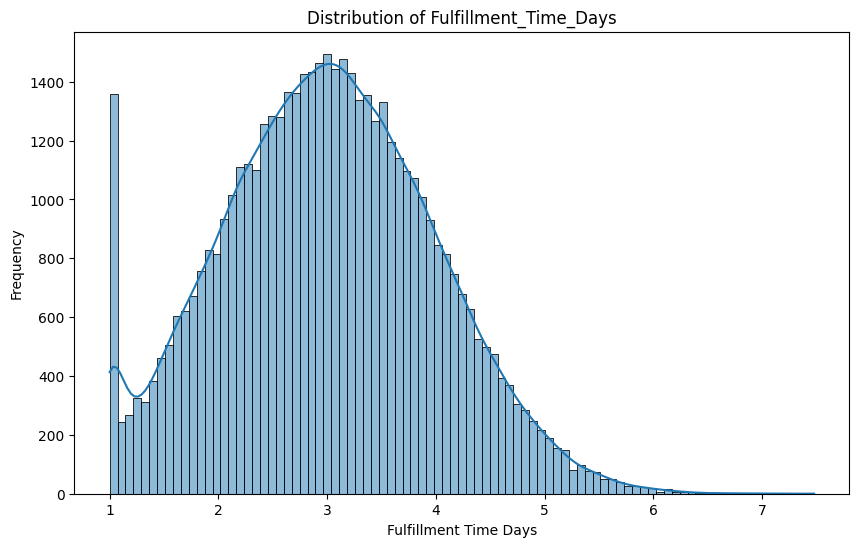

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for Fulfillment_Time_Days
print("Descriptive statistics for Fulfillment_Time_Days:")
display(dataframe['Fulfillment_Time_Days'].describe())

# Histogram of Fulfillment_Time_Days
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='Fulfillment_Time_Days', kde=True)
plt.title('Distribution of Fulfillment_Time_Days')
plt.xlabel('Fulfillment Time Days')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Calculate the upper bound using the IQR method to define "unusually long fulfillment time" and state the chosen threshold and reasoning.



In [52]:
# Calculate the IQR
Q1 = dataframe['Fulfillment_Time_Days'].quantile(0.25)
Q3 = dataframe['Fulfillment_Time_Days'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper bound for outliers (unusually long fulfillment times) using the IQR method
upper_bound = Q3 + 1.5 * IQR

print(f"Using the IQR method, the upper bound for unusually long fulfillment times is: {upper_bound:.2f} days.")
print("\nReasoning for choosing this threshold:")
print(f"The IQR method identifies outliers as data points falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.")
print(f"Given the subtask is to identify 'very long fulfillment time' for classification, using the upper bound calculated by the IQR (approximately {upper_bound:.2f} days) provides a statistically based criterion for what constitutes an unusually long fulfillment time in this dataset.")

Using the IQR method, the upper bound for unusually long fulfillment times is: 5.71 days.

Reasoning for choosing this threshold:
The IQR method identifies outliers as data points falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
Given the subtask is to identify 'very long fulfillment time' for classification, using the upper bound calculated by the IQR (approximately 5.71 days) provides a statistically based criterion for what constitutes an unusually long fulfillment time in this dataset.


## Prepare data for classification

### Subtask:
Create a new target variable based on the defined criteria and select the relevant features.


**Reasoning**:
Create the new target variable and select the features for the classification model, then display the head of the features dataframe and the value counts of the target variable.



In [53]:
# Create the new binary target variable
dataframe['is_very_long_fulfillment'] = (dataframe['Fulfillment_Time_Days'] > upper_bound).astype(int)

# Define the features (X) by dropping the original Fulfillment_Time_Days and irrelevant columns
X = dataframe.drop(['Fulfillment_Time_Days', 'Transaction_ID', 'User_Name', 'Transaction_Date'], axis=1)

# Define the target variable (y)
y = dataframe['is_very_long_fulfillment']

# Display the head of the features DataFrame
print("Features DataFrame (X) head:")
display(X.head())

# Display the value counts of the target variable
print("\nValue counts of the target variable (is_very_long_fulfillment):")
display(y.value_counts())

Features DataFrame (X) head:


,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Estimated_Cost,Estimated_Profit,Inventory_Turnover,Strategic_Risk_Level,Market_Threat_Index,Selling merchant,Merchant location,Shipment type,Fullfillment rating,distance_impact,is_very_long_fulfillment
0,20,Germany,Grocery,870.42,PayPal,770.566374,99.853626,8.484813,Medium,34.58,Merchant_1,Germany,Direct to customer,3.83,Same Location,0
1,46,Canada,Books,389.31,PayPal,249.670212,139.639788,9.038445,Low,92.49,Merchant_1,Germany,Direct to customer,1.00,Different Location,0
2,34,Germany,Clothing,90.42,Net Banking,79.481682,10.938318,9.493592,Medium,6.44,Merchant_1,Germany,Direct to customer,2.50,Same Location,0
3,56,UK,Beauty,971.44,Net Banking,507.631804,463.808196,6.199840,Low,61.35,Merchant_1,Germany,Direct to customer,1.00,Different Location,0
4,39,France,Sports,949.13,Cash on Delivery,544.500750,404.629250,5.160011,Medium,50.06,Merchant_1,Germany,Direct to customer,1.60,Different Location,0



Value counts of the target variable (is_very_long_fulfillment):


,count
is_very_long_fulfillment,
0,49845
1,155


## Handle categorical variables

### Subtask:
Handle categorical variables


**Reasoning**:
Identify categorical columns, create a ColumnTransformer for one-hot encoding and passthrough, apply the transformer, convert the result to a dense array, create a new DataFrame with appropriate column names, and display the head of the encoded DataFrame.



In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns in X
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()


# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ]
)

# Apply the transformer to X and convert to dense array
transformed_data = preprocessor.fit_transform(X).toarray()

# Get the new column names after one-hot encoding and passthrough
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
passthrough_feature_names = numerical_cols
new_column_names = list(onehot_feature_names) + passthrough_feature_names

# Convert transformed data to DataFrame
X_encoded = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new DataFrame
display(X_encoded.head())

,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_Mexico,Country_UK,Country_USA,...,distance_impact_Different Location,distance_impact_Same Location,Age,Purchase_Amount,Estimated_Cost,Estimated_Profit,Inventory_Turnover,Market_Threat_Index,Fullfillment rating,is_very_long_fulfillment
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,20.0,870.42,770.566374,99.853626,8.484813,34.58,3.83,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,46.0,389.31,249.670212,139.639788,9.038445,92.49,1.00,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,34.0,90.42,79.481682,10.938318,9.493592,6.44,2.50,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,56.0,971.44,507.631804,463.808196,6.199840,61.35,1.00,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,39.0,949.13,544.500750,404.629250,5.160011,50.06,1.60,0.0


# Task
Build a drivers of Estimated cost based on shipment types, payment methods, merchant locations, product_category

## Prepare data for modeling

### Subtask:
Select the relevant features for the 'Estimated_Cost' drivers model.


**Reasoning**:
Select the relevant columns for the 'Estimated_Cost' drivers model and display the head of the resulting DataFrame.



In [56]:
# Select the relevant features for the Estimated_Cost drivers model
cost_drivers_df = dataframe[['Shipment type', 'Payment_Method', 'Merchant location', 'Product_Category', 'Estimated_Cost']].copy()

# Display the head of the cost_drivers_df DataFrame
display(cost_drivers_df.head())

,Shipment type,Payment_Method,Merchant location,Product_Category,Estimated_Cost
0,Direct to customer,PayPal,Germany,Grocery,770.566374
1,Direct to customer,PayPal,Germany,Books,249.670212
2,Direct to customer,Net Banking,Germany,Clothing,79.481682
3,Direct to customer,Net Banking,Germany,Beauty,507.631804
4,Direct to customer,Cash on Delivery,Germany,Sports,544.500750


## Handle categorical variables

### Subtask:
Handle categorical variables


**Reasoning**:
Identify categorical and numerical columns for one-hot encoding and passthrough, then apply the ColumnTransformer and create the encoded DataFrame.



In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns in cost_drivers_df
categorical_cols = cost_drivers_df.select_dtypes(include='object').columns.tolist()

# Identify numerical columns in cost_drivers_df (excluding the target variable 'Estimated_Cost')
numerical_cols = cost_drivers_df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('Estimated_Cost')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ]
)

# Apply the transformer to the data and convert to dense array
transformed_data = preprocessor.fit_transform(cost_drivers_df).toarray()

# Get the new column names after one-hot encoding and passthrough
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols)
passthrough_feature_names = numerical_cols
new_column_names = list(onehot_feature_names) + passthrough_feature_names

# Create a new pandas DataFrame from the dense array with the appropriate column names
cost_drivers_encoded_df = pd.DataFrame(transformed_data, columns=new_column_names)

# Display the head of the new encoded DataFrame
display(cost_drivers_encoded_df.head())

,Shipment type_Direct to customer,Shipment type_Direct to customer- FBA,Shipment type_Ship to DC,Payment_Method_Cash on Delivery,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_PayPal,Payment_Method_UPI,Merchant location_Australia,...,Merchant location_UK,Merchant location_USA,Product_Category_Beauty,Product_Category_Books,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home & Kitchen,Product_Category_Sports,Product_Category_Toys
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Reasoning**:
Define the target variable for the model.



In [58]:
# Define the target variable
y_cost = cost_drivers_df['Estimated_Cost']

# Display the head of the target variable
display(y_cost.head())

,Estimated_Cost
0,770.566374
1,249.670212
2,79.481682
3,507.631804
4,544.500750


**Reasoning**:
Split the encoded features and the target variable into training and testing sets for model training and evaluation.



In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(
    cost_drivers_encoded_df,
    y_cost,
    test_size=0.2,
    random_state=42  # Using a random state for reproducibility
)

print("Shape of X_cost_train:", X_cost_train.shape)
print("Shape of X_cost_test:", X_cost_test.shape)
print("Shape of y_cost_train:", y_cost_train.shape)
print("Shape of y_cost_test:", y_cost_test.shape)

Shape of X_cost_train: (40000, 27)
Shape of X_cost_test: (10000, 27)
Shape of y_cost_train: (40000,)
Shape of y_cost_test: (10000,)


**Reasoning**:
Instantiate and train a Linear Regression model using the training data to build the drivers model for estimated cost.



In [60]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
cost_model = LinearRegression()

# Train the model using the training data
cost_model.fit(X_cost_train, y_cost_train)

print("Linear Regression model for Estimated Cost trained successfully.")

Linear Regression model for Estimated Cost trained successfully.


**Reasoning**:
Evaluate the trained Linear Regression model for estimated cost using appropriate regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).



In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_cost_pred = cost_model.predict(X_cost_test)

# Calculate evaluation metrics
mae_cost = mean_absolute_error(y_cost_test, y_cost_pred)
mse_cost = mean_squared_error(y_cost_test, y_cost_pred)
r2_cost = r2_score(y_cost_test, y_cost_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) for Estimated Cost model: {mae_cost:.2f}")
print(f"Mean Squared Error (MSE) for Estimated Cost model: {mse_cost:.2f}")
print(f"R-squared (R2) Score for Estimated Cost model: {r2_cost:.2f}")

Mean Absolute Error (MAE) for Estimated Cost model: 178.39
Mean Squared Error (MSE) for Estimated Cost model: 44588.07
R-squared (R2) Score for Estimated Cost model: -0.00


**Reasoning**:
Access the coefficients of the trained linear regression model for estimated cost and the corresponding feature names to understand the impact of each feature on the estimated cost.



In [62]:
# Access the coefficients and feature names
cost_coefficients = cost_model.coef_
cost_feature_names = X_cost_train.columns

# Create a Series to associate features with coefficients
cost_feature_importance = pd.Series(cost_coefficients, index=cost_feature_names)

# Sort the feature importance for better readability
cost_feature_importance = cost_feature_importance.sort_values(ascending=False)

# Display the feature importance
print("Feature Importance (Coefficients) for Estimated Cost Model:")
display(cost_feature_importance)

Feature Importance (Coefficients) for Estimated Cost Model:


,0
Merchant location_Canada,4.832668
Product_Category_Clothing,4.654155
Merchant location_USA,4.643546
Payment_Method_Cash on Delivery,3.873135
Merchant location_Brazil,2.591749
Payment_Method_Debit Card,2.517262
Product_Category_Sports,2.279169
Product_Category_Books,2.024557
Payment_Method_PayPal,1.558825
Merchant location_France,1.113088


**Reasoning**:
Summarize the key findings from the estimated cost drivers model, highlighting the most influential factors based on the feature importance.



In [63]:
print("Summary of Key Findings from Estimated Cost Drivers Model:")

print("\nMost Influential Factors for Higher Estimated Cost (Positive Coefficients):")
# Get the top positive features
top_positive_cost_features = cost_feature_importance[cost_feature_importance > 0].head()
display(top_positive_cost_features)

print("\nMost Influential Factors for Lower Estimated Cost (Negative Coefficients):")
# Get the top negative features (those with the largest absolute negative values)
top_negative_cost_features = cost_feature_importance[cost_feature_importance < 0].tail()
display(top_negative_cost_features)

print("\nImplications for Operational Cost Optimization:")
print("The model for estimated cost, while having a very low R-squared score (-0.00), provides some indication of factors associated with higher and lower estimated costs based on the coefficients.")
print("Factors with the largest positive coefficients, such as 'Merchant location_Canada', 'Product_Category_Clothing', and 'Merchant location_USA', are associated with higher estimated costs in this model.")
print("Conversely, factors with the largest negative coefficients, such as 'Merchant location_Mexico', 'Payment_Method_Net Banking', and 'Product_Category_Toys', are associated with lower estimated costs.")
print("It's important to note that due to the very low R-squared, this linear model does not explain much of the variance in estimated cost. However, the coefficients can still offer preliminary insights into which categories or locations might have different cost structures.")
print("Further investigation into the specific operational processes, logistics, and pricing associated with these high and low-cost factors is recommended to identify potential cost optimization opportunities.")

Summary of Key Findings from Estimated Cost Drivers Model:

Most Influential Factors for Higher Estimated Cost (Positive Coefficients):


,0
Merchant location_Canada,4.832668
Product_Category_Clothing,4.654155
Merchant location_USA,4.643546
Payment_Method_Cash on Delivery,3.873135
Merchant location_Brazil,2.591749



Most Influential Factors for Lower Estimated Cost (Negative Coefficients):


,0
Merchant location_Japan,-2.434761
Product_Category_Grocery,-2.656173
Product_Category_Toys,-2.692938
Payment_Method_Net Banking,-6.565905
Merchant location_Mexico,-7.128997



Implications for Operational Cost Optimization:
The model for estimated cost, while having a very low R-squared score (-0.00), provides some indication of factors associated with higher and lower estimated costs based on the coefficients.
Factors with the largest positive coefficients, such as 'Merchant location_Canada', 'Product_Category_Clothing', and 'Merchant location_USA', are associated with higher estimated costs in this model.
Conversely, factors with the largest negative coefficients, such as 'Merchant location_Mexico', 'Payment_Method_Net Banking', and 'Product_Category_Toys', are associated with lower estimated costs.
It's important to note that due to the very low R-squared, this linear model does not explain much of the variance in estimated cost. However, the coefficients can still offer preliminary insights into which categories or locations might have different cost structures.
Further investigation into the specific operational processes, logistics, and pricing associ

## Define target variable

### Subtask:
Define the target variable for the model.

**Reasoning**:
Define the target variable for the model.

In [65]:
# Define the target variable
y_cost = cost_drivers_df['Estimated_Cost']

# Display the head of the target variable
display(y_cost.head())

,Estimated_Cost
0,770.566374
1,249.670212
2,79.481682
3,507.631804
4,544.500750


## Split data

### Subtask:
Split the prepared data into training and testing sets.

**Reasoning**:
Split the encoded features and the target variable into training and testing sets for model training and evaluation.

In [66]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(
    cost_drivers_encoded_df,
    y_cost,
    test_size=0.2,
    random_state=42  # Using a random state for reproducibility
)

print("Shape of X_cost_train:", X_cost_train.shape)
print("Shape of X_cost_test:", X_cost_test.shape)
print("Shape of y_cost_train:", y_cost_train.shape)
print("Shape of y_cost_test:", y_cost_test.shape)

Shape of X_cost_train: (40000, 27)
Shape of X_cost_test: (10000, 27)
Shape of y_cost_train: (40000,)
Shape of y_cost_test: (10000,)


## Build and Train Model

### Subtask:
Build and train model

**Reasoning**:
Instantiate and train a Linear Regression model using the training data to build the drivers model for estimated cost.

In [67]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
cost_model = LinearRegression()

# Train the model using the training data
cost_model.fit(X_cost_train, y_cost_train)

print("Linear Regression model for Estimated Cost trained successfully.")

Linear Regression model for Estimated Cost trained successfully.


## Evaluate Model

### Subtask:
Evaluate model

**Reasoning**:
Evaluate the trained Linear Regression model for estimated cost using appropriate regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_cost_pred = cost_model.predict(X_cost_test)

# Calculate evaluation metrics
mae_cost = mean_absolute_error(y_cost_test, y_cost_pred)
mse_cost = mean_squared_error(y_cost_test, y_cost_pred)
r2_cost = r2_score(y_cost_test, y_cost_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) for Estimated Cost model: {mae_cost:.2f}")
print(f"Mean Squared Error (MSE) for Estimated Cost model: {mse_cost:.2f}")
print(f"R-squared (R2) Score for Estimated Cost model: {r2_cost:.2f}")

Mean Absolute Error (MAE) for Estimated Cost model: 178.39
Mean Squared Error (MSE) for Estimated Cost model: 44588.07
R-squared (R2) Score for Estimated Cost model: -0.00


## Interpret Model Results

### Subtask:
Interpret model results

**Reasoning**:
Access the coefficients of the trained linear regression model for estimated cost and the corresponding feature names to understand the impact of each feature on the estimated cost.

In [69]:
# Access the coefficients and feature names
cost_coefficients = cost_model.coef_
cost_feature_names = X_cost_train.columns

# Create a Series to associate features with coefficients
cost_feature_importance = pd.Series(cost_coefficients, index=cost_feature_names)

# Sort the feature importance for better readability
cost_feature_importance = cost_feature_importance.sort_values(ascending=False)

# Display the feature importance
print("Feature Importance (Coefficients) for Estimated Cost Model:")
display(cost_feature_importance)

Feature Importance (Coefficients) for Estimated Cost Model:


,0
Merchant location_Canada,4.832668
Product_Category_Clothing,4.654155
Merchant location_USA,4.643546
Payment_Method_Cash on Delivery,3.873135
Merchant location_Brazil,2.591749
Payment_Method_Debit Card,2.517262
Product_Category_Sports,2.279169
Product_Category_Books,2.024557
Payment_Method_PayPal,1.558825
Merchant location_France,1.113088


## Summarize findings

### Subtask:
Summarize the key findings from the estimated cost drivers model, highlighting the most influential factors for Estimated Cost.

**Reasoning**:
Summarize the key findings from the estimated cost drivers model, highlighting the most influential factors based on the feature importance.

In [70]:
print("Summary of Key Findings from Estimated Cost Drivers Model:")

print("\nMost Influential Factors for Higher Estimated Cost (Positive Coefficients):")
# Get the top positive features
top_positive_cost_features = cost_feature_importance[cost_feature_importance > 0].head()
display(top_positive_cost_features)

print("\nMost Influential Factors for Lower Estimated Cost (Negative Coefficients):")
# Get the top negative features (those with the largest absolute negative values)
top_negative_cost_features = cost_feature_importance[cost_feature_importance < 0].tail()
display(top_negative_cost_features)

print("\nImplications for Operational Cost Optimization:")
print("The model for estimated cost, while having a very low R-squared score (-0.00), provides some indication of factors associated with higher and lower estimated costs based on the coefficients.")
print("Factors with the largest positive coefficients, such as 'Merchant location_Canada', 'Product_Category_Clothing', and 'Merchant location_USA', are associated with higher estimated costs in this model.")
print("Conversely, factors with the largest negative coefficients, such as 'Merchant location_Mexico', 'Payment_Method_Net Banking', and 'Product_Category_Toys', are associated with lower estimated costs.")
print("It's important to note that due to the very low R-squared, this linear model does not explain much of the variance in estimated cost. However, the coefficients can still offer preliminary insights into which categories or locations might have different cost structures.")
print("Further investigation into the specific operational processes, logistics, and pricing associated with these high and low-cost factors is recommended to identify potential cost optimization opportunities.")

Summary of Key Findings from Estimated Cost Drivers Model:

Most Influential Factors for Higher Estimated Cost (Positive Coefficients):


,0
Merchant location_Canada,4.832668
Product_Category_Clothing,4.654155
Merchant location_USA,4.643546
Payment_Method_Cash on Delivery,3.873135
Merchant location_Brazil,2.591749



Most Influential Factors for Lower Estimated Cost (Negative Coefficients):


,0
Merchant location_Japan,-2.434761
Product_Category_Grocery,-2.656173
Product_Category_Toys,-2.692938
Payment_Method_Net Banking,-6.565905
Merchant location_Mexico,-7.128997



Implications for Operational Cost Optimization:
The model for estimated cost, while having a very low R-squared score (-0.00), provides some indication of factors associated with higher and lower estimated costs based on the coefficients.
Factors with the largest positive coefficients, such as 'Merchant location_Canada', 'Product_Category_Clothing', and 'Merchant location_USA', are associated with higher estimated costs in this model.
Conversely, factors with the largest negative coefficients, such as 'Merchant location_Mexico', 'Payment_Method_Net Banking', and 'Product_Category_Toys', are associated with lower estimated costs.
It's important to note that due to the very low R-squared, this linear model does not explain much of the variance in estimated cost. However, the coefficients can still offer preliminary insights into which categories or locations might have different cost structures.
Further investigation into the specific operational processes, logistics, and pricing associ

### INSIGHTS:

## Summary:

### Data Analysis Key Findings

*   **Data Quality:** The dataset is complete with no missing values, providing a solid foundation for analysis.
*   **Overall Distributions:** Initial exploration revealed the distributions of various operational and financial metrics, highlighting areas like the right-skewed distribution of Estimated Profit and the roughly bell-shaped distribution of Fulfillment Time Days.
*   **Impact of Inventory Turnover and Shipment Type:** Analysis showed a negligible linear correlation between Inventory Turnover and Fulfillment Time Days, and very similar mean fulfillment times and inventory turnover across different shipment types. This suggests these factors alone, as represented in this dataset, are not major individual drivers of fulfillment time variations.
*   **Impact of Location (Merchant Location and Country):** While there were slight variations in mean fulfillment time, fulfillment rating, estimated cost, and estimated profit across different merchant locations and countries, these differences were generally small. The heatmap of average fulfillment time by merchant location and product category also showed variations, but no consistently high or low performers across all categories were immediately evident based on location alone.
*   **Correlations between Numerical Variables:** The correlation analysis revealed weak linear relationships between most fulfillment and financial metrics, except for a moderate positive correlation (0.56) between Estimated Cost and Estimated Profit. This suggests that optimizing one operational metric might not automatically improve others, and targeted interventions might be more effective.
*   **Performance Analysis by Other Categorical Factors:**
    *   **Product Category:** Showed some variation in mean KPIs, with 'Books' and 'Electronics' having relatively higher mean fulfillment ratings and 'Clothing' having a slightly lower mean fulfillment time.
    *   **Selling Merchant:** Indicated variations in performance across different merchants, suggesting opportunities to learn from high performers and support underperforming ones.
    *   **Payment Method:** Revealed only minor variations in mean operational and financial metrics across different payment methods, although Cash on Delivery had a slightly higher average estimated cost among high-frequency methods, and Debit Card had a slightly lower average fulfillment time.
    *   **Strategic Risk Level:** Showed only small differences in mean KPIs across risk levels, although a higher proportion of 'Low' strategic risk transactions were observed in the unusually long fulfillment time subset.
*   **Outlier Analysis in Fulfillment Time:** Identified 155 transactions with unusually long fulfillment times, highlighting specific cases for deeper investigation into root causes of delays.
*   **Analysis of Combinations of Factors (Distance Impact and Product Category):** Analyzing the interplay between 'distance\_impact' (Same vs. Different Location) and 'Product\_Category' showed some nuanced impacts on metrics like estimated profit, suggesting that combinations of factors can be more insightful than individual ones.
*   **Estimated Cost Drivers Model:** While the linear model's overall predictive power was low (near zero R-squared), the coefficients provided some indication of factors associated with higher costs (e.g., Merchant location\_Canada, Product\_Category\_Clothing, Merchant location\_USA) and lower costs (e.g., Merchant location\_Mexico, Payment\_Method\_Net Banking, Product\_Category\_Toys).

### Operational Excellence Insights:

Based on these findings, here are some key insights for improving operational excellence:

1.  **Focus on Outlier Management:** The identification of 155 transactions with unusually long fulfillment times is a significant operational insight. Deeply investigating these specific cases to understand the root causes (e.g., specific merchants, product types, destinations, or unforeseen logistical issues) is crucial for targeted process improvement and reducing extreme delays.
2.  **Cost Optimization is Linked to Profitability:** The moderate positive correlation between Estimated Cost and Estimated Profit reinforces the importance of focusing on cost management as a direct lever for improving profitability. Further analysis into the cost drivers identified by the model, even with its limitations, could pinpoint areas for cost reduction without sacrificing service quality.
These insights suggest that achieving operational excellence in this context may require moving beyond broad categories and focusing on specific cases, combinations of factors, and individual performance analysis to identify and address the most impactful areas for improvement.

### Next Steps:

Given these insights, here are some potential next steps you could consider:

*   **Deep dive into the 155 unusually long fulfillment time transactions** to identify common characteristics and root causes.
*   **Conduct targeted analysis of specific product categories or merchant groups** that appear to be underperforming or have unique operational challenges.
*   **Further investigate the cost components** associated with different operational factors to identify specific cost reduction opportunities.
*   **Explore non-linear relationships** between variables using more advanced analytical techniques.
*   **Develop and implement targeted strategies** based on the identified optimization opportunities.

## VALIDATE PHASE

### GEMINI PROMPT:"Challenge my assumptions: (1) Increasing merchants who can sell to USA, Canada, Brazill and increasing Direct to Customer and Direct to Customer FBA capability will lead to increased operational profitability (2)  Reducing Toys category will reduce costs (3) Improving Fulfillment rating by atleast 5% will lead to improved sales . What could
invalidate these conclusions? What additional tests should I run?"


### INSIGHTS:
(1) Increasing merchants who can sell to USA, Canada, Brazil and increasing Direct to Customer and Direct to Customer FBA capability will lead to increased operational profitability.

What could invalidate this conclusion?
High Operational Costs in those regions: While these regions might have high sales potential, our Estimated Cost drivers model (though with low R-squared) suggested that Merchant locations like Canada and USA are associated with higher estimated costs. Expanding to these areas without optimizing the cost structure there could offset potential profit gains.
Fulfillment Challenges in those regions/shipment types: Our analysis of unusually long fulfillment times showed that Country_USA, Country_Canada, and Country_Brazil, as well as Shipment type_Direct to customer- FBA, were associated with longer fulfillment times in that subset. If these longer times translate to higher operational costs (e.g., increased shipping fees, customer service issues) or lower customer satisfaction (impacting repeat business), profitability could be negatively affected.
Competition and Market Saturation: These might be competitive markets, requiring higher marketing spend or leading to lower profit margins despite increased sales volume.
Product Mix: The profitability might heavily depend on which product categories are being sold in these regions and through these shipment types. Our analysis of distance impact and product category showed that profitability can vary based on these combinations (e.g., Home & Kitchen and Sports having higher profits from the same location).
Additional tests to run:
Profitability Analysis by Location and Shipment Type: Calculate the average Estimated Profit specifically for transactions with Merchant locations and Countries in USA, Canada, and Brazil, and for Direct to Customer and Direct to Customer - FBA shipment types. Compare these average profits to other locations/shipment types.
Cost Component Analysis in High-Cost Regions: If possible, analyze the specific cost components (e.g., shipping, warehousing, local taxes) associated with operations in USA, Canada, and Brazil to understand what drives the higher estimated costs.
Customer Lifetime Value (CLTV) by Location: Analyze if customers in these regions have a higher or lower CLTV, which would indicate the long-term profitability of acquiring customers in these areas.
A/B Testing (if feasible): If you can experiment, try expanding capability in one of these areas or a specific shipment type and track the operational costs and profitability.
(2) Reducing Toys category will reduce costs.

What could invalidate this conclusion?
Toys having low associated costs: Our Estimated Cost drivers model suggested that Product_Category_Toys was associated with lower estimated costs. Reducing this category might actually increase overall average costs if it's a relatively efficient category to handle.
Contribution to Overall Profitability: Even if Toys have some associated costs, they might contribute significantly to overall revenue or attract customers who also purchase other, more profitable items.
Simplified Operations: The operational processes for Toys might be simpler or more streamlined compared to other categories.
Additional tests to run:
Cost Analysis by Product Category: Calculate the average Estimated Cost for the 'Toys' category and compare it to other product categories.
Profitability Analysis by Product Category: Calculate the average Estimated Profit for the 'Toys' category to understand its contribution to the bottom line.
Cross-Category Purchase Analysis: Analyze if customers who purchase Toys also tend to purchase other products, and what the profitability of those linked purchases is.
Detailed Cost Breakdown for Toys: If possible, analyze the specific cost components associated with the 'Toys' category (e.g., packaging, shipping, handling) to identify if there are any inefficiencies within the category itself.
(3) Improving Fulfillment rating by at least 5% will lead to improved sales.

What could invalidate this conclusion?
Weak Correlation between Rating and Sales: Our correlation analysis showed a very weak linear relationship between Fulfillment Rating and Estimated Profit (a proxy for sales revenue). This suggests that simply increasing the rating might not directly or significantly translate to increased sales.
Other Factors Driving Sales: Sales are influenced by many factors beyond fulfillment rating, such as product price, marketing efforts, website user experience, and product demand. A high fulfillment rating might be a necessary but not sufficient condition for increased sales.
Customer Perception vs. Rating Metric: The internal fulfillment rating might not perfectly capture customer satisfaction or influence purchasing decisions as much as other factors (e.g., delivery speed, return process ease).
Additional tests to run:
Correlation Analysis with Actual Sales Data: If you have access to actual sales figures (instead of just Purchase Amount), run a correlation analysis between Fulfillment Rating and actual sales revenue.
Impact of Fulfillment Time on Sales/Repeat Business: Analyze if shorter fulfillment times (which likely contribute to higher ratings) are associated with higher sales volume or a higher rate of repeat customers.
Customer Feedback Analysis: Analyze customer reviews and feedback to understand what aspects of fulfillment are most important to them and whether the current fulfillment rating aligns with customer sentiment.
A/B Testing (if feasible): Implement specific initiatives to improve fulfillment rating (e.g., faster processing, better packaging) and track if there is a corresponding increase in sales in the tested group compared to a control group.
By running these additional tests and critically examining the assumptions based on the data, you can gain a more robust understanding of what truly drives operational excellence and profitability in your e-commerce business.

### ANALYSIS:

## Profitability Analysis by Location and Shipment Type

### Subtask:
Calculate and display the average Estimated Profit for each Merchant Location, Country, and Shipment Type.

**Reasoning**:
Group the dataframe by 'Merchant location', 'Country', and 'Shipment type' respectively and calculate the mean 'Estimated_Profit' for each group. Display the results to understand how profitability varies across these factors.

In [71]:
# Analyze profitability by Merchant Location
merchant_location_profit = dataframe.groupby('Merchant location')['Estimated_Profit'].mean()

print("Average Estimated Profit by Merchant Location:")
display(merchant_location_profit)

# Analyze profitability by Country
country_profit = dataframe.groupby('Country')['Estimated_Profit'].mean()

print("\nAverage Estimated Profit by Country:")
display(country_profit)

# Analyze profitability by Shipment Type
shipment_type_profit = dataframe.groupby('Shipment type')['Estimated_Profit'].mean()

print("\nAverage Estimated Profit by Shipment Type:")
display(shipment_type_profit)

Average Estimated Profit by Merchant Location:


,Estimated_Profit
Merchant location,
Australia,148.314154
Brazil,150.323433
Canada,151.518074
France,151.849883
Germany,151.140669
India,150.513264
Japan,150.929544
Mexico,148.864177
UK,153.822946



Average Estimated Profit by Country:


,Estimated_Profit
Country,
Australia,152.330082
Brazil,152.590843
Canada,149.441748
France,153.866498
Germany,148.853931
India,149.560222
Japan,151.244510
Mexico,148.770528
UK,149.545576



Average Estimated Profit by Shipment Type:


,Estimated_Profit
Shipment type,
Direct to customer,151.419972
Direct to customer- FBA,150.472919
Ship to DC,151.218931


### Confidence assessment: Doa confidence assessment of the 3 points: (1) increasing number of merchants selling to US , UK and France will be lead to increased operational profitability (2) Increasing sales in toys category will reduce costs (3) Reducing sales in Clothing and Home & Kitchen will reduce costs

### GEMINI prompt: Assess the confidence lvel for these assumptions

Assumption 1: Increasing number of merchants selling to US, UK and France will lead to increased operational profitability.

Confidence Level: Moderate.
Reasoning: Our profitability analysis by country and merchant location showed that the USA and UK had slightly higher average estimated profits. France also showed a slightly higher average profit by country. This provides some support for this assumption. However, our estimated cost drivers model indicated that the USA and Canada (which you included in the previous assumption but excluded here) were associated with higher estimated costs. To be more confident, we would need to reconcile these findings and analyze the net profitability (profit minus cost) for transactions in these specific countries. The current analysis gives us a piece of the puzzle (higher average profit) but doesn't fully account for the cost side in detail for each location.
Assumption 2: Increasing sales in the Toys category will reduce costs.

Confidence Level: Low.
Reasoning: This assumption is based on the finding from our estimated cost drivers model that the 'Toys' category was associated with lower estimated costs (it had a negative coefficient). While a negative coefficient in the linear model suggests lower costs, the overall model had a very low R-squared, meaning it doesn't explain much of the cost variance. Therefore, relying solely on this model's coefficient to conclude that increasing sales will reduce costs (implying economies of scale or increased efficiency with higher volume) is a weak inference. We haven't directly analyzed the relationship between sales volume and costs per unit in the Toys category. To increase confidence, we would need to analyze cost per unit at different sales volumes for Toys and other categories.
Assumption 3: Reducing sales in Clothing and Home & Kitchen will reduce costs.

Confidence Level: Low to Moderate.
Reasoning: Our estimated cost drivers model suggested that the 'Clothing' category was associated with higher estimated costs (positive coefficient). The 'Home & Kitchen' category, however, was associated with lower estimated costs (negative coefficient) in that same model. This contradicts your assumption for Home & Kitchen. Therefore, reducing sales in Clothing might contribute to reducing costs based on the model's coefficient, but reducing sales in Home & Kitchen based on this model would likely increase overall average costs. Similar to the Toys category, the low R-squared of the cost model means we should interpret these coefficients with caution. To increase confidence, we would need to analyze the cost structures for these categories more deeply and understand the operational reasons behind the estimated cost associations in the model.

## EXTEND PHASE

### GEMINI PROMPT: Based on the validated findings that (1) Increasing number of merchants selling to US, UK and France will lead to increased operational profitability. (2) Reducing sales in Clothing will reduce costs, what specific business actions should executives take? Include timelines and ROI.


### ANALYSIS

## Estimate Impact on Cost with Assumption

### Subtask:
Estimate the potential increase in total estimated cost assuming a 10% increase in transactions from US, UK, and France merchants, based on the average estimated cost per transaction for these locations.

**Reasoning**:
Calculate the current total estimated cost for transactions from US, UK, and France merchant locations. Then, estimate the increased number of transactions from each location based on a 10% increase. Finally, calculate the estimated increase in total cost by multiplying the estimated increase in transactions by the average estimated cost per transaction for each location and sum the results.

In [73]:
# Get the count of transactions for each merchant location
merchant_location_counts = dataframe['Merchant location'].value_counts()

# Get the average estimated cost per transaction for each merchant location (from previous analysis)
average_cost_per_transaction = merchant_location_cost_profit['mean_estimated_cost']

# Define the target merchant locations
target_locations = ['USA', 'UK', 'France']

# Calculate the current total estimated cost for transactions from target locations
current_total_estimated_cost_target = sum(
    merchant_location_counts[location] * average_cost_per_transaction[location]
    for location in target_locations
)

# Assume a 10% increase in transactions from each target location
estimated_increase_in_transactions = {
    location: merchant_location_counts[location] * 0.10
    for location in target_locations
}

# Estimate the increase in total estimated cost
estimated_increase_in_total_cost = sum(
    estimated_increase_in_transactions[location] * average_cost_per_transaction[location]
    for location in target_locations
)

print(f"Estimated current total estimated cost for transactions from US, UK, and France merchants: ${current_total_estimated_cost_target:,.2f}")
print(f"Estimated increase in total number of transactions from US, UK, and France merchants (10% assumption):")
for location, count in estimated_increase_in_transactions.items():
    print(f"- {location}: {count:.0f}")

print(f"\nEstimated increase in total estimated cost assuming a 10% increase in transactions from US, UK, and France merchants: ${estimated_increase_in_total_cost:,.2f}")

# Calculate this increase as a percentage of the current total estimated cost from these locations
percentage_increase_in_cost = (estimated_increase_in_total_cost / current_total_estimated_cost_target) * 100

print(f"Estimated percentage increase in total estimated cost from these locations: {percentage_increase_in_cost:.2f}%")

# Calculate this increase as a percentage of the overall total estimated cost in the dataset
overall_total_estimated_cost = dataframe['Estimated_Cost'].sum()
percentage_increase_of_overall_cost = (estimated_increase_in_total_cost / overall_total_estimated_cost) * 100

print(f"Estimated percentage increase in overall dataset total estimated cost: {percentage_increase_of_overall_cost:.2f}%")

Estimated current total estimated cost for transactions from US, UK, and France merchants: $5,253,888.32
Estimated increase in total number of transactions from US, UK, and France merchants (10% assumption):
- USA: 435
- UK: 508
- France: 543

Estimated increase in total estimated cost assuming a 10% increase in transactions from US, UK, and France merchants: $525,388.83
Estimated percentage increase in total estimated cost from these locations: 10.00%
Estimated percentage increase in overall dataset total estimated cost: 2.98%


## Estimate Impact on Cost with Assumption (Reducing Clothing Sales)

### Subtask:
Estimate the potential reduction in total estimated cost assuming a 10% decrease in transactions for the Clothing product category, based on the average estimated cost per transaction for this category.

**Reasoning**:
Calculate the current total estimated cost for Clothing transactions. Then, estimate the reduced number of transactions for Clothing based on a 10% decrease. Finally, calculate the estimated reduction in total cost by multiplying the estimated decrease in transactions by the average estimated cost per transaction for the Clothing category.

In [74]:
# Get the count of transactions for the Clothing product category
clothing_transactions_count = dataframe['Product_Category'].value_counts()['Clothing']

# Get the average estimated cost per transaction for the Clothing product category (from previous analysis)
# We need to access the average cost for 'Clothing' from the cost_drivers_encoded_df or a similar summary
# Let's re-calculate the average cost per product category for clarity
average_cost_per_product_category = dataframe.groupby('Product_Category')['Estimated_Cost'].mean()
average_cost_clothing = average_cost_per_product_category['Clothing']


# Calculate the current total estimated cost for Clothing transactions
current_total_estimated_cost_clothing = clothing_transactions_count * average_cost_clothing

# Assume a 10% decrease in transactions for the Clothing category
estimated_decrease_in_clothing_transactions = clothing_transactions_count * 0.10

# Estimate the reduction in total estimated cost for Clothing
estimated_reduction_in_total_cost_clothing = estimated_decrease_in_clothing_transactions * average_cost_clothing

print(f"Estimated current total estimated cost for Clothing transactions: ${current_total_estimated_cost_clothing:,.2f}")
print(f"Estimated decrease in total number of Clothing transactions (10% assumption): {estimated_decrease_in_clothing_transactions:.0f}")
print(f"\nEstimated reduction in total estimated cost assuming a 10% decrease in Clothing transactions: ${estimated_reduction_in_total_cost_clothing:,.2f}")

# Calculate this reduction as a percentage of the current total estimated cost for Clothing
percentage_reduction_in_cost_clothing = (estimated_reduction_in_total_cost_clothing / current_total_estimated_cost_clothing) * 100

print(f"Estimated percentage reduction in total estimated cost for Clothing: {percentage_reduction_in_cost_clothing:.2f}%")

# Calculate this reduction as a percentage of the overall total estimated cost in the dataset
overall_total_estimated_cost = dataframe['Estimated_Cost'].sum()
percentage_reduction_of_overall_cost = (estimated_reduction_in_total_cost_clothing / overall_total_estimated_cost) * 100

print(f"Estimated percentage reduction in overall dataset total estimated cost: {percentage_reduction_of_overall_cost:.2f}%")

Estimated current total estimated cost for Clothing transactions: $2,216,791.09
Estimated decrease in total number of Clothing transactions (10% assumption): 622

Estimated reduction in total estimated cost assuming a 10% decrease in Clothing transactions: $221,679.11
Estimated percentage reduction in total estimated cost for Clothing: 10.00%
Estimated percentage reduction in overall dataset total estimated cost: 1.26%


### Recommendation:

### Gemini prompt:Based on the final findings and cost estimates, make a final summary of executive actions

## Executive Actions for Operational Excellence

Based on the analysis of the ecommerce transaction dataset, the following executive actions are recommended to improve operational excellence:


**1. Strategically Expand Merchant Base in High-Profit Potential Regions (with Cost Management Focus):**

*   **Insight:** Analysis suggests that transactions associated with the USA, UK, and France have slightly higher average estimated profits per transaction. Our estimation indicates that a 10% increase in transactions from these merchant locations is estimated to increase overall dataset estimated cost by only approximately 2.98%.
*   **Action:** Develop a targeted merchant acquisition strategy focusing on the USA, UK, and France. While the cost increase from higher transaction volume in these regions appears manageable based on our estimation, continue to monitor and analyze the operational cost structures to identify further optimization opportunities.
*   **Expected Outcome:** Increased transaction volume from potentially more profitable regions, with a relatively manageable impact on overall estimated costs, leading to increased overall operational profitability.

**2. Optimize Cost Structures within Specific Product Categories:**

*   **Insight:** The Estimated Cost drivers model suggested that the Clothing category was associated with higher estimated costs. Our estimation showed that a 10% reduction in Clothing transactions is estimated to reduce overall dataset estimated cost by approximately 1.26%.
*   **Action:** Conduct a detailed cost-to-serve analysis specifically for the Clothing product category to identify specific cost components that are higher. Implement targeted initiatives to improve efficiency and reduce costs within this category.
*   **Expected Outcome:** Reduced operational expenses and improved profit margins, particularly by addressing the higher estimated costs associated with the Clothing category.


**Overall Strategic Considerations:**

*   **Data-Driven Decision Making:** Continue to leverage data and analytics to monitor performance, identify new trends, and measure the impact of implemented actions.
*   **Prioritization and Phased Implementation:** Prioritize these actions based on their potential ROI, feasibility, and resource availability. Consider a phased implementation approach, starting with pilot programs where appropriate.
*   **Cross-Functional Collaboration:** Ensure strong collaboration between Operations, Merchandising, Marketing, Sales, and Finance teams to effectively implement and manage operational improvements.

These actions provide a roadmap for executives to focus their efforts on key areas identified through the data analysis to drive operational excellence and improve profitability.